### Create the critical status figures we're using for each Comm Pass
This queries from MAUDE, which should update ~30 min after the SSR dump at the start of each comm pass. 

In [2]:
import Ska.engarchive.fetch as fetch
import Chandra.Time

import datetime as dt
import matplotlib.dates as mdate
from matplotlib import gridspec

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from hrcsentinel import hrccore as hrc

%config InlineBackend.figure_format = 'retina'


#### Setup

In [3]:
fetch.data_source.set('cxc', 'maude') # allow_subset=True should let us draw more data points
#fetch.data_source.set('cxc') # Toggle this if you want to query your local Ska archive first

In [4]:
hrc.styleplots()

# Grab the ggplot colors so you can manually set them if needed
colortable = plt.rcParams['axes.prop_cycle'].by_key()['color']
red = colortable[0]
blue = colortable[1]
yellow = colortable[4]
green = colortable[5]
pink = colortable[6]
purple = colortable[2]


In [5]:

# Use today's date, plus 2 days
end_date = dt.date.today() + dt.timedelta(days=2)

In [6]:
fig_save_dir = '/Users/grant/HRCOps/HRCAnomaly2020/Figures/'

#### Critical event times

In [7]:
sunday_pass = dt.datetime(2020,8,24,2,30)
sunday_pass_end = dt.datetime(2020,8,24,3,27,34)

eventdate = mdate.num2date(hrc.convert_chandra_time([714627954.9676153660]))
fa6_heater_poweroff = dt.datetime(2020, 8, 24, 14, 38)
hrc_poweroff_date = dt.datetime(2020, 8, 24, 15, 7, 26)
morning_pass_time = dt.datetime(2020, 8, 24, 13, 45)
evening_pass_time = dt.datetime(2020, 8, 24, 21, 20)

tuesday_community_brief = dt.datetime(2020, 8, 25, 13, 0)
wednesday_community_brief = dt.datetime(2020, 8, 26, 13, 0)

cap_step_2 = dt.datetime(2020, 8, 27, 0, 13)
cap_step_5 = dt.datetime(2020, 8, 27, 0, 24)
cap_step_8 = dt.datetime(2020, 8, 27, 0, 40)

#### The famous 6am pass in which everything looked fine
thursday_early_pass = dt.datetime(2020,8,27,10,0)
thursday_early_pass_end = dt.datetime(2020,8,27,11,0)

#### I got the time of second anomaly from the first bad frame in the data. That is the Chandra time stamp below. 
time_of_second_anomaly = hrc.convert_chandra_time([714916399.97800004])
human_time_of_second_anomaly = mdate.num2date(time_of_second_anomaly) # Just to have a human-readable time

time_of_secont_shutdown = hrc.convert_chandra_time([714951463.18])
human_time_of_second_shutdown = mdate.num2date(time_of_secont_shutdown) # Just to have a human-readable time

time_of_cap_1543 = dt.datetime(2020,8,31,17,50)

In [8]:
voltage_msids = ['2P24VAVL', # 24 V bus EED voltage,
                 '2P15VAVL', # +15 V bus EED voltage
                 '2P05VAVL', # +05 V bus EED voltage
                 '2N15VAVL'  # +15 V bus EED voltage
                ]

voltage_msids_b = ['2P24VBVL', # 24 V bus EED voltage,
                 '2P15VBVL', # +15 V bus EED voltage
                 '2P05VBVL', # +05 V bus EED voltage
                 '2N15VBVL'  # +15 V bus EED voltage
                ]

temperature_msids = [
    "2FE00ATM",  # Front-end Temperature (c)
    "2LVPLATM",  # LVPS Plate Temperature (c)
    "2IMHVATM",  # Imaging Det HVPS Temperature (c)
    "2IMINATM",  # Imaging Det Temperature (c)
    "2SPHVATM",  # Spectroscopy Det HVPS Temperature (c)
    "2SPINATM",  # Spectroscopy Det Temperature (c)
    "2PMT1T"  ,  # PMT 1 EED Temperature (c)
    "2PMT2T"  ,  # PMT 2 EED Temperature (c)
    "2DCENTRT",  # Outdet2 EED Temperature (c)
    "2FHTRMZT",  # FEABox EED Temperature (c)
    "2CHTRPZT",  # CEABox EED Temperature (c)
    "2FRADPYT",  # +Y EED Temperature (c)
    "2CEAHVPT",  # -Y EED Temperature (c)
    "2CONDMXT",  # Conduit Temperature (c)
    "2UVLSPXT",  # Snout Temperature (c)
    "2CE00ATM",  # CEA Temperature 1 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    "2CE01ATM",  # CEA Temperature 2 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
    "2FEPRATM",  # FEA PreAmp (c)
    "2SMTRATM",  # Selected Motor Temperature (c) THIS IS ALWAYS 5 DEGREES THROUGHOUT ENTIRE MISSION
    "2DTSTATT"   # OutDet1 Temperature (c)
]


rate_msids = ['2TLEV1RT', # The Total Event Rate
              '2VLEV1RT', # VAlie Event Rate
              '2SHEV1RT', # Shield Event Rate
             ]


all_relevant_hrc_msids = [ "2SHEV1RT",  # HRC AntiCo Shield Rates (1)
                            "2TLEV1RT",  # HRC Detector Event Rates (c/s) (1)
                            "2PRBSVL",   # Primary Bus Voltage (V)
                            "2PRBSCR",   # Primary Bus Current (amps)
                            "2C05PALV",  # +5V Bus Monitor
                            "2C15NALV",  # -15V Bus Monitor
                            "2C15PALV",  # +15V Bus Monitor
                            "2C24PALV",  # +24V Bus Monitor
                            "2FE00ATM",  # Front-end Temperature (c)
                            "2LVPLATM",  # LVPS Plate Temperature (c)
                            "2IMHVATM",  # Imaging Det HVPS Temperature (c)
                            "2IMINATM",  # Imaging Det Temperature (c)
                            "2SPHVATM",  # Spectroscopy Det HVPS Temperature (c)
                            "2SPINATM",  # Spectroscopy Det Temperature (c)
                            "2PMT1T",    # PMT 1 EED Temperature (c)
                            "2PMT2T",    # PMT 2 EED Temperature (c)
                            "2DCENTRT",  # Outdet2 EED Temperature (c)
                            "2FHTRMZT",  # FEABox EED Temperature (c)
                            "2CHTRPZT",  # CEABox EED Temperature (c)
                            "2FRADPYT",  # +Y EED Temperature (c)
                            "2CEAHVPT",  # -Y EED Temperature (c)
                            "2CONDMXT",  # Conduit Temperature (c)
                            "2UVLSPXT",  # Snout Temperature (c)
                            "2CE00ATM",  # CEA Temperature 1 (c)
                            "2CE01ATM", # CEA Temperature 2 (c)
                            "2FEPRATM", # FEA PreAmp (c)
                            "2SMTRATM", # Selected Motor Temperature (c)
                            "2DTSTATT" # OutDet1 Temperature (c)
                ]

spacecraft_orbit_pseudomsids = ["Dist_SatEarth", # Chandra-Earth distance (from Earth Center) (m)
                               "Point_SunCentAng"      # Pointing-Solar angle (from center) (deg)
                               ]

secondary_science_corruption = ["HRC_SS_HK_BAD"] # Times flagged as Secondary Science Corruption

mission_events = ["obsids", 
                  "orbits", 
                  "dsn_comms", 
                  "dwells", 
                  "eclipses", 
                  "rad_zones", 
                  "safe_suns", 
                  "scs107s", 
                  "major_events"]

MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE


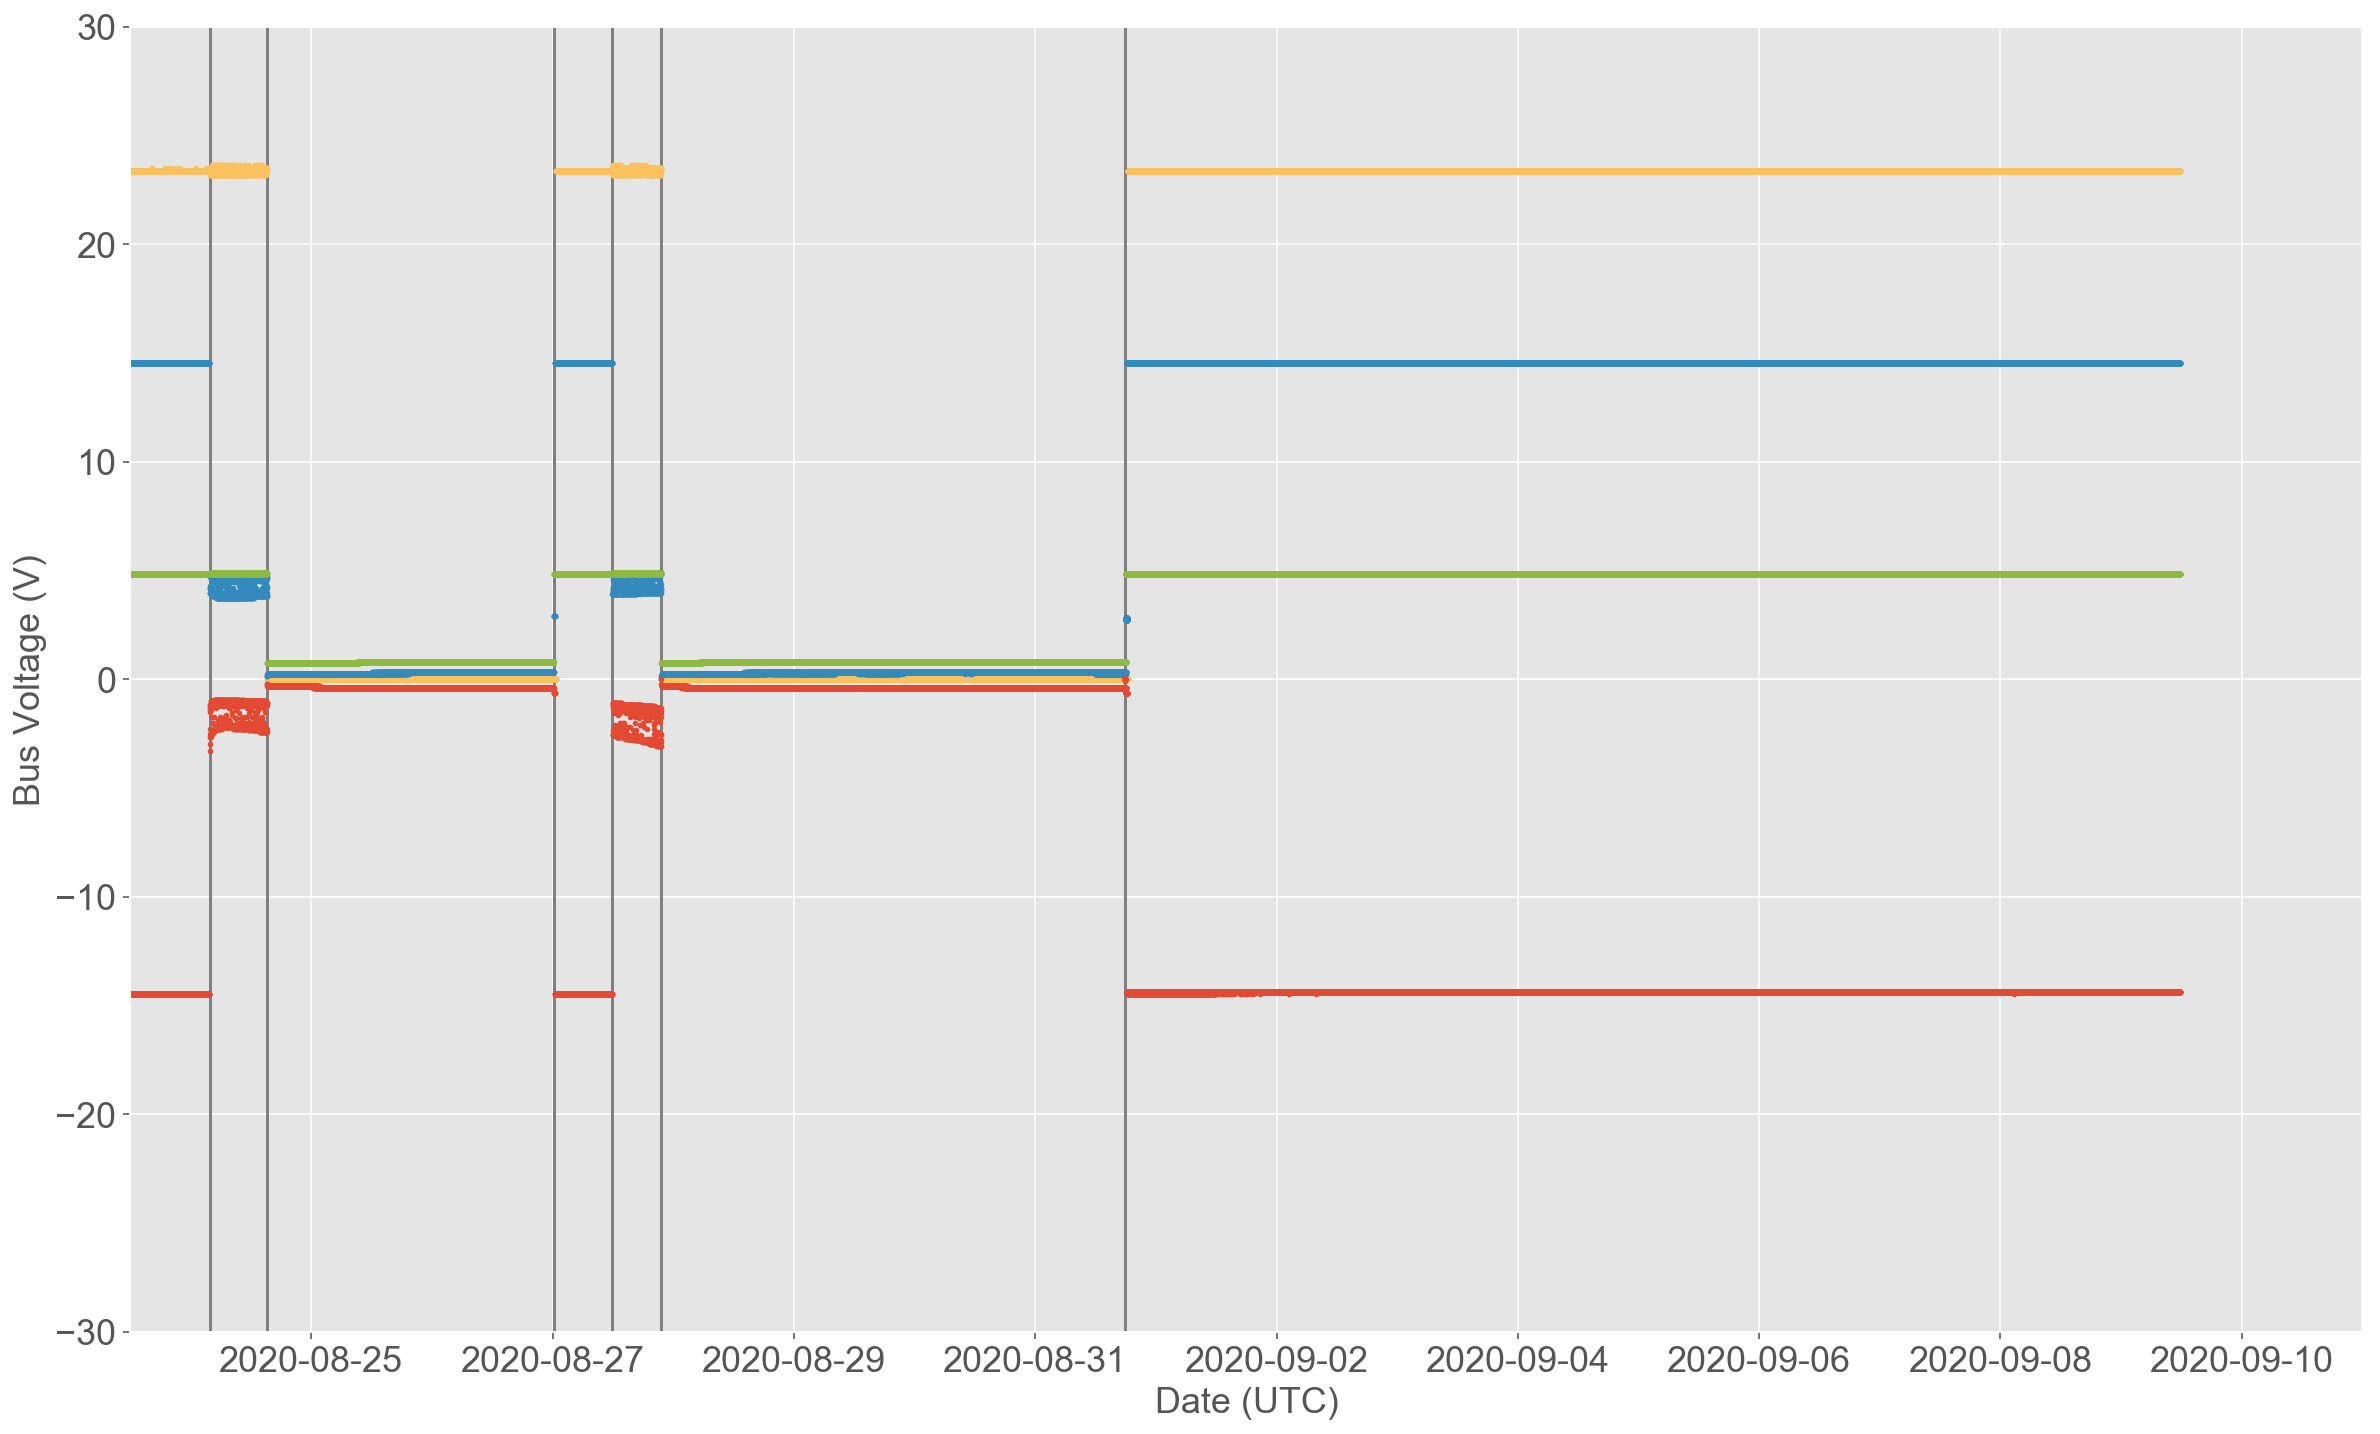

In [9]:
fetch.data_source.set('maude')
colors_to_use = [yellow, blue, green, red]

fig, ax = plt.subplots(figsize=(20,12))

rasterized=True
markersize=1.8

# ax.axvline(sunday_pass, color='gray', ymin=0.5, ymax=0.8)
# ax.axvline(sunday_pass_end, color='gray', linestyle='dashed', ymin=0.5, ymax=0.8)

# ax.text(sunday_pass, 32,'blah', color='dimgray', size=10)

ax.axvline(eventdate, color='gray')

# ax.text(eventdate, 32,'blah', color='gray', size=10)

ax.axvline(hrc_poweroff_date, color='gray')
ax.axvline(cap_step_2, color='gray')
# ax.axvline(thursday_early_pass, color='gray', ymin=0.5, ymax=0.8)
# ax.axvline(thursday_early_pass_end, color='gray', linestyle='dashed', ymin=0.5, ymax=0.8)

ax.axvline(time_of_second_anomaly, color='gray')
ax.axvline(time_of_secont_shutdown, color='gray')

ax.axvline(time_of_cap_1543, color='gray')

for msid, color in zip(voltage_msids, colors_to_use):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:234')
    print('DONE')
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    cut_aside_mdate = mdate.date2num(time_of_cap_1543)
    stop_aplot_idx = np.where(times > cut_aside_mdate)[0][0]
    
    ax.plot_date(times[:stop_aplot_idx], vals[:stop_aplot_idx], markersize=markersize, rasterized=rasterized, color=color,  label=msid.MSID)
    
for msid, color in zip(voltage_msids_b, colors_to_use):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:244')
    print('DONE')
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    start_bplot_idx = np.where(times < cut_aside_mdate)[0][0]

    ax.plot_date(times[start_bplot_idx:], vals[start_bplot_idx:], markersize=markersize, rasterized=rasterized, color=color,  label=msid.MSID)
 
    
# lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# for i in range(len(lgnd.legendHandles)):
#     lgnd.legendHandles[i]._legmarker.set_markersize(20)

ax.set_ylabel('Bus Voltage (V)')
ax.set_xlabel('Date (UTC)')

xmin = dt.datetime(2020, 8, 23, 12)
xmax = end_date
ax.set_xlim(xmin, xmax)
# ax.set_ylim(-20, 50)
ax.set_ylim(-30, 30)

plt.show()

fig.savefig(fig_save_dir + 'power.pdf', dpi=300, rasterized=True, bbox_inches='tight')

MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE


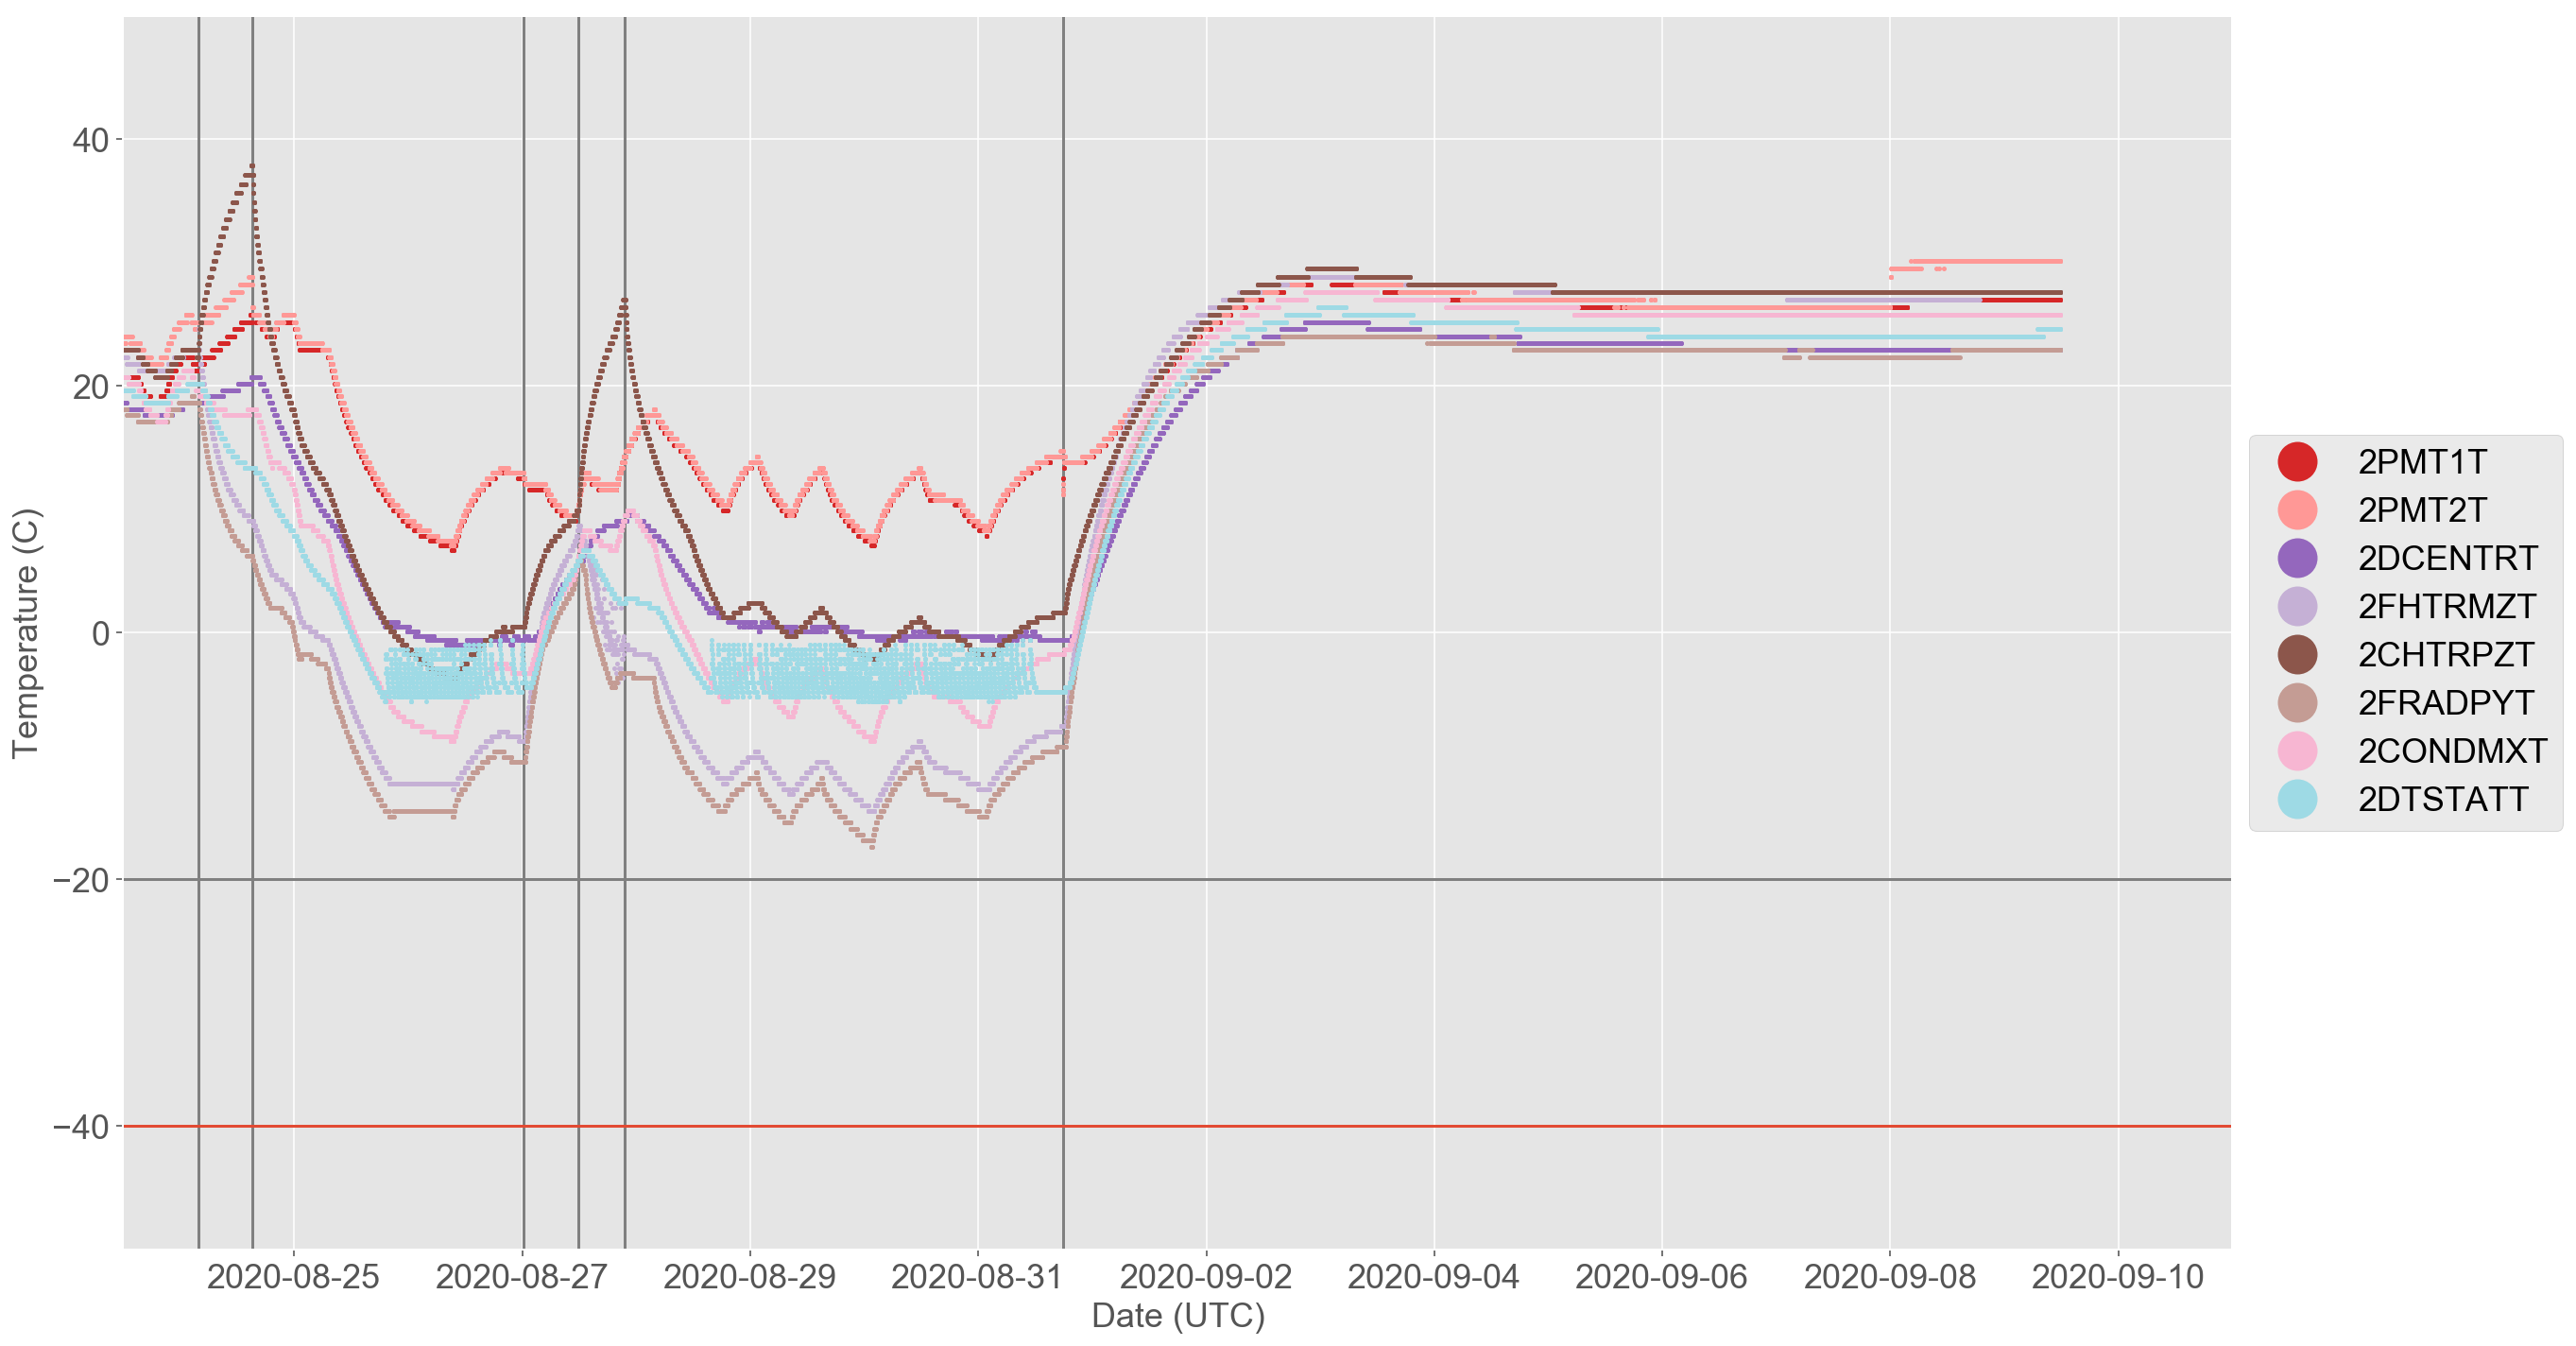

In [10]:
fetch.data_source.set('maude')
fig, ax = plt.subplots(figsize=(20,12))

rasterized=True
markersize=1.5


# ax.axvline(sunday_pass, color='gray')
# ax.axvline(sunday_pass_end, color='gray', linestyle='dashed')
ax.axvline(eventdate, color='gray')
ax.axvline(hrc_poweroff_date, color='gray')
ax.axvline(cap_step_2, color='gray')
# ax.axvline(thursday_early_pass, color='gray')
# ax.axvline(thursday_early_pass_end, color='gray', linestyle='dashed')

ax.axvline(time_of_second_anomaly, color='gray')
ax.axvline(time_of_secont_shutdown, color='gray')

ax.axvline(time_of_cap_1543, color='gray')

ax.axhline(-20, color='gray')
ax.axhline(-40, color=red)

n_lines = len(temperature_msids)
color_idx = np.linspace(0, 1, n_lines)


for i, msid in zip(color_idx, temperature_msids):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:225')
    print('DONE')
    
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    if msid.content == 'hrc5eng':
        ax.plot_date(times, vals, markersize=markersize, rasterized=rasterized, color=plt.cm.tab20(i), label=msid.MSID)

    
lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._legmarker.set_markersize(20)

ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Date (UTC)')

xmin = dt.datetime(2020, 8, 23, 12)
xmax = end_date
ax.set_xlim(xmin, xmax)

ax.set_ylim(-50, 50)


plt.show()


fig.savefig(fig_save_dir + 'temperatures.pdf', dpi=300, rasterized=True, bbox_inches='tight')

MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE


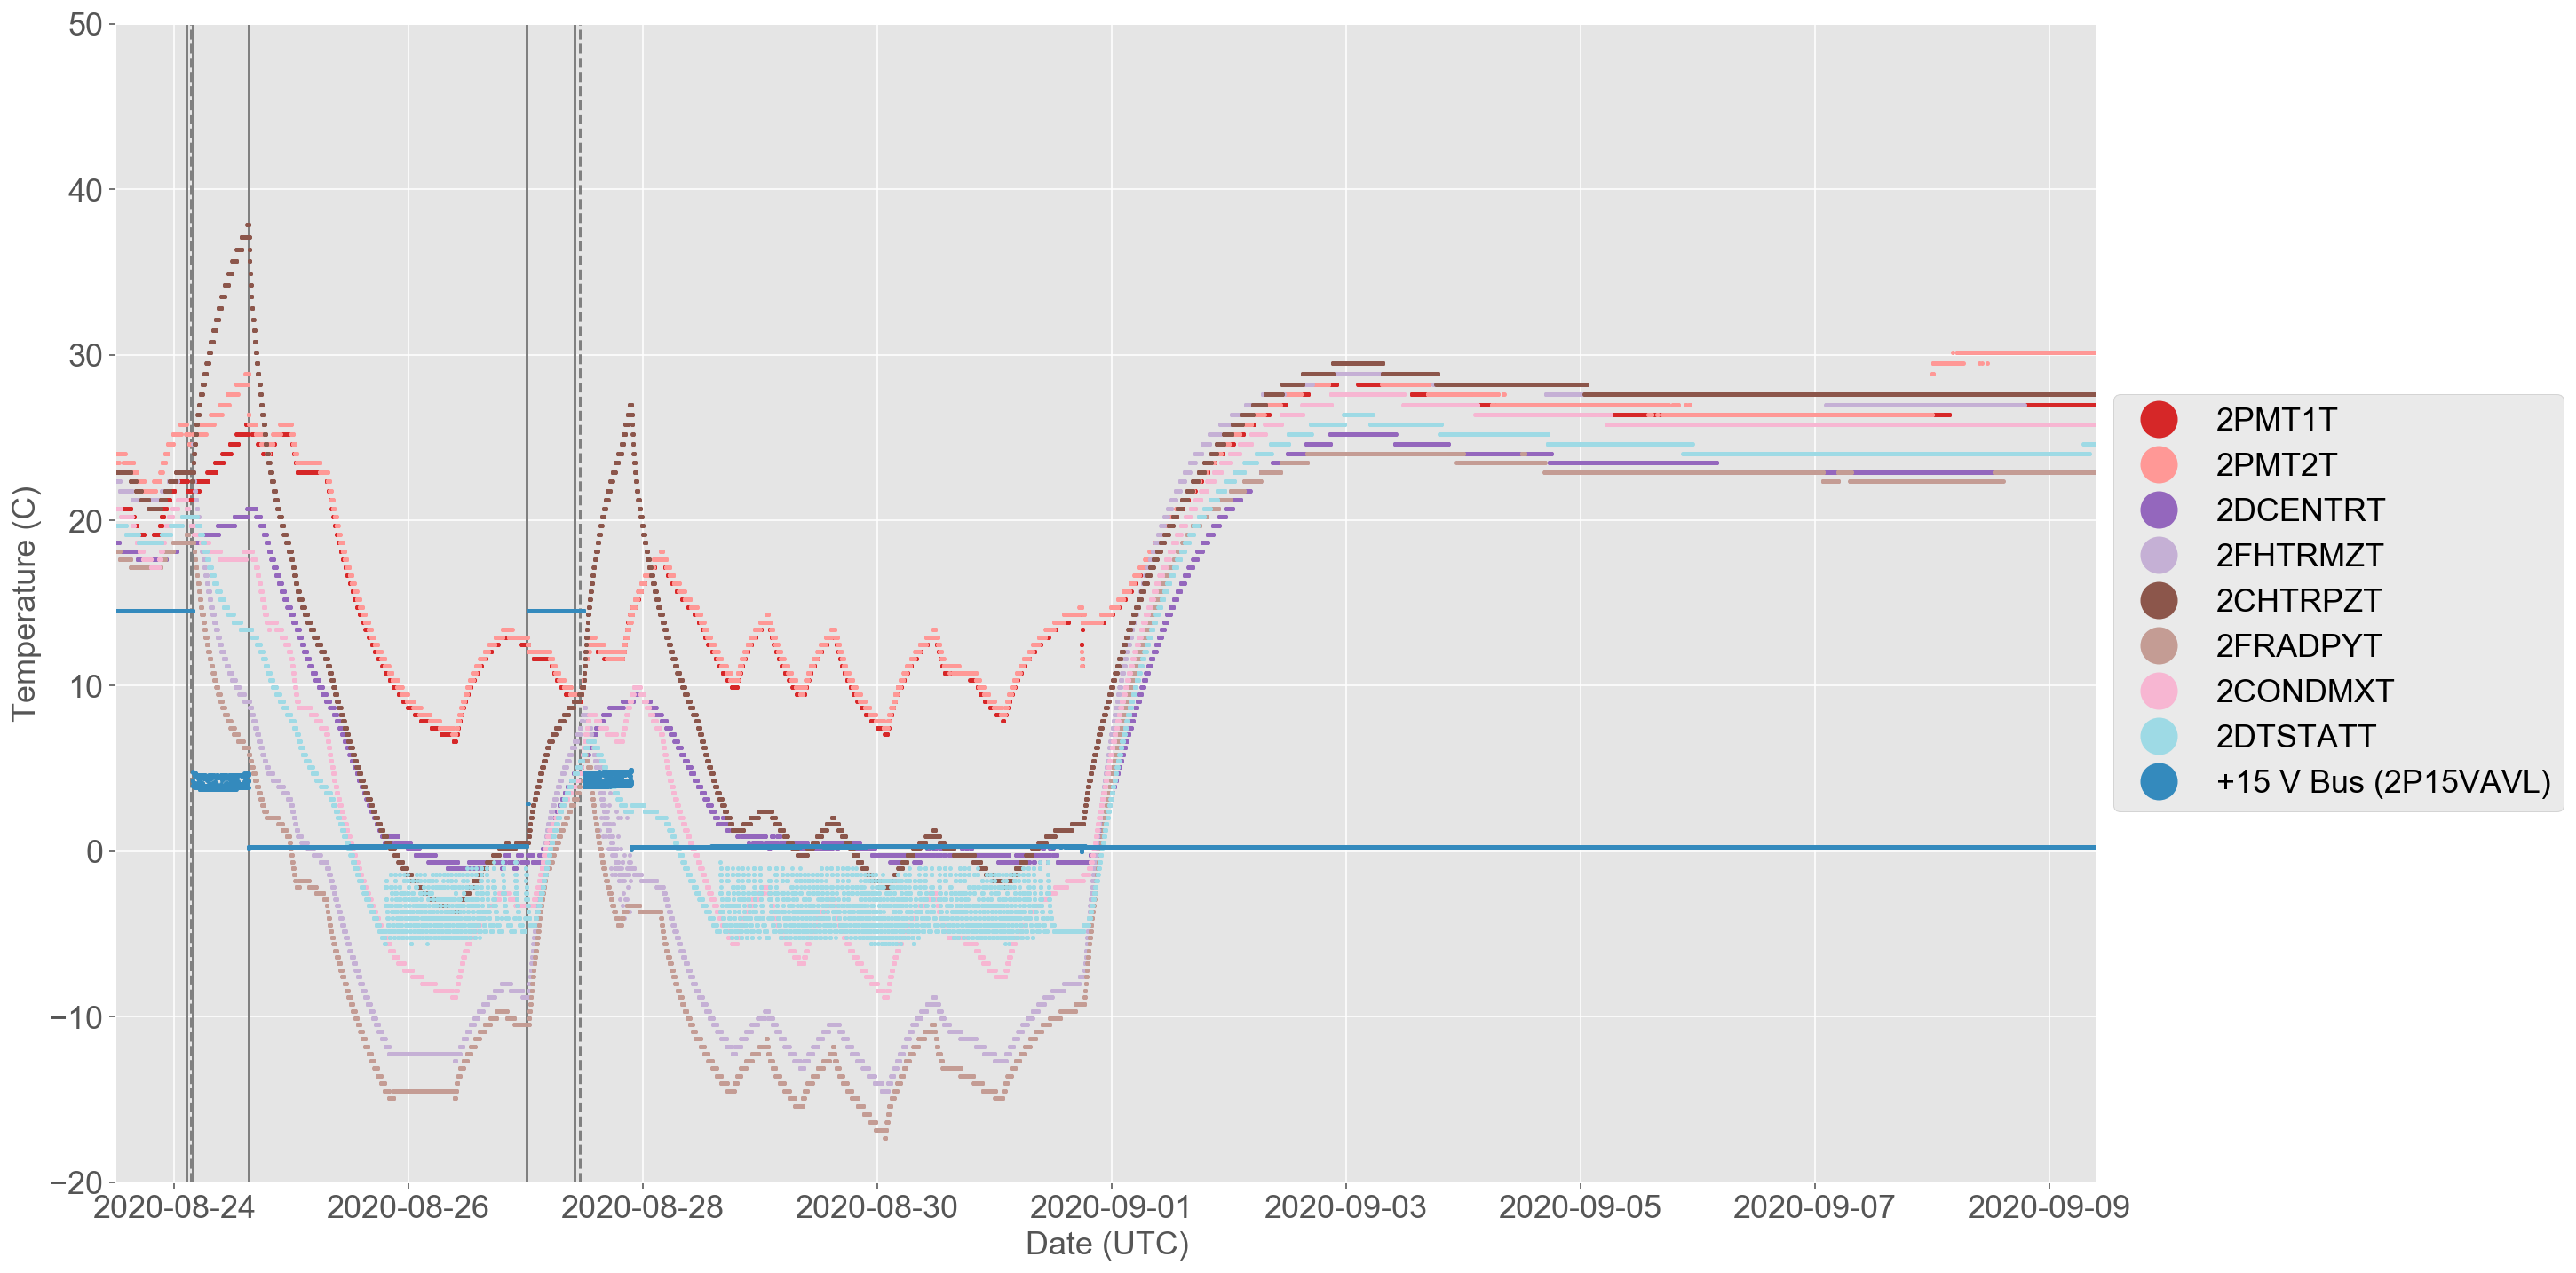

In [12]:
fetch.data_source.set('maude')
fig, ax = plt.subplots(figsize=(20,12))

rasterized=True
markersize=1.5


ax.axvline(sunday_pass, color='gray')
ax.axvline(sunday_pass_end, color='gray', linestyle='dashed')
ax.axvline(eventdate, color='gray')
ax.axvline(hrc_poweroff_date, color='gray')
ax.axvline(cap_step_2, color='gray')
ax.axvline(thursday_early_pass, color='gray')
ax.axvline(thursday_early_pass_end, color='gray', linestyle='dashed')



n_lines = len(temperature_msids)
color_idx = np.linspace(0, 1, n_lines)


for i, msid in zip(color_idx, temperature_msids):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:225')
    print('DONE')
    
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    if msid.content == 'hrc5eng':
        ax.plot_date(times, vals, markersize=markersize, rasterized=rasterized, color=plt.cm.tab20(i), label=msid.MSID)

vmsid = fetch.MSID('2P15VAVL', start='2020:225')
vtimes = hrc.convert_chandra_time(vmsid.times)
ax.plot_date(vtimes, vmsid.vals, color=blue, markersize=markersize, rasterized=rasterized, label='+15 V Bus (2P15VAVL)')
        
lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._legmarker.set_markersize(20)

ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Date (UTC)')

xmin = dt.datetime(2020, 8, 23, 12)
xmax = dt.datetime.today()
ax.set_xlim(xmin, xmax)

ax.set_ylim(-20, 50)


plt.show()


fig.savefig(fig_save_dir + 'temp_and_voltage.pdf', dpi=300, rasterized=True, bbox_inches='tight')

Fetching full-resolution data for MSIDS=['2PRBSCR', '2CHTRPZT']
  from 2020:245:12:00:00.000 to 2020:251:11:47:25.315


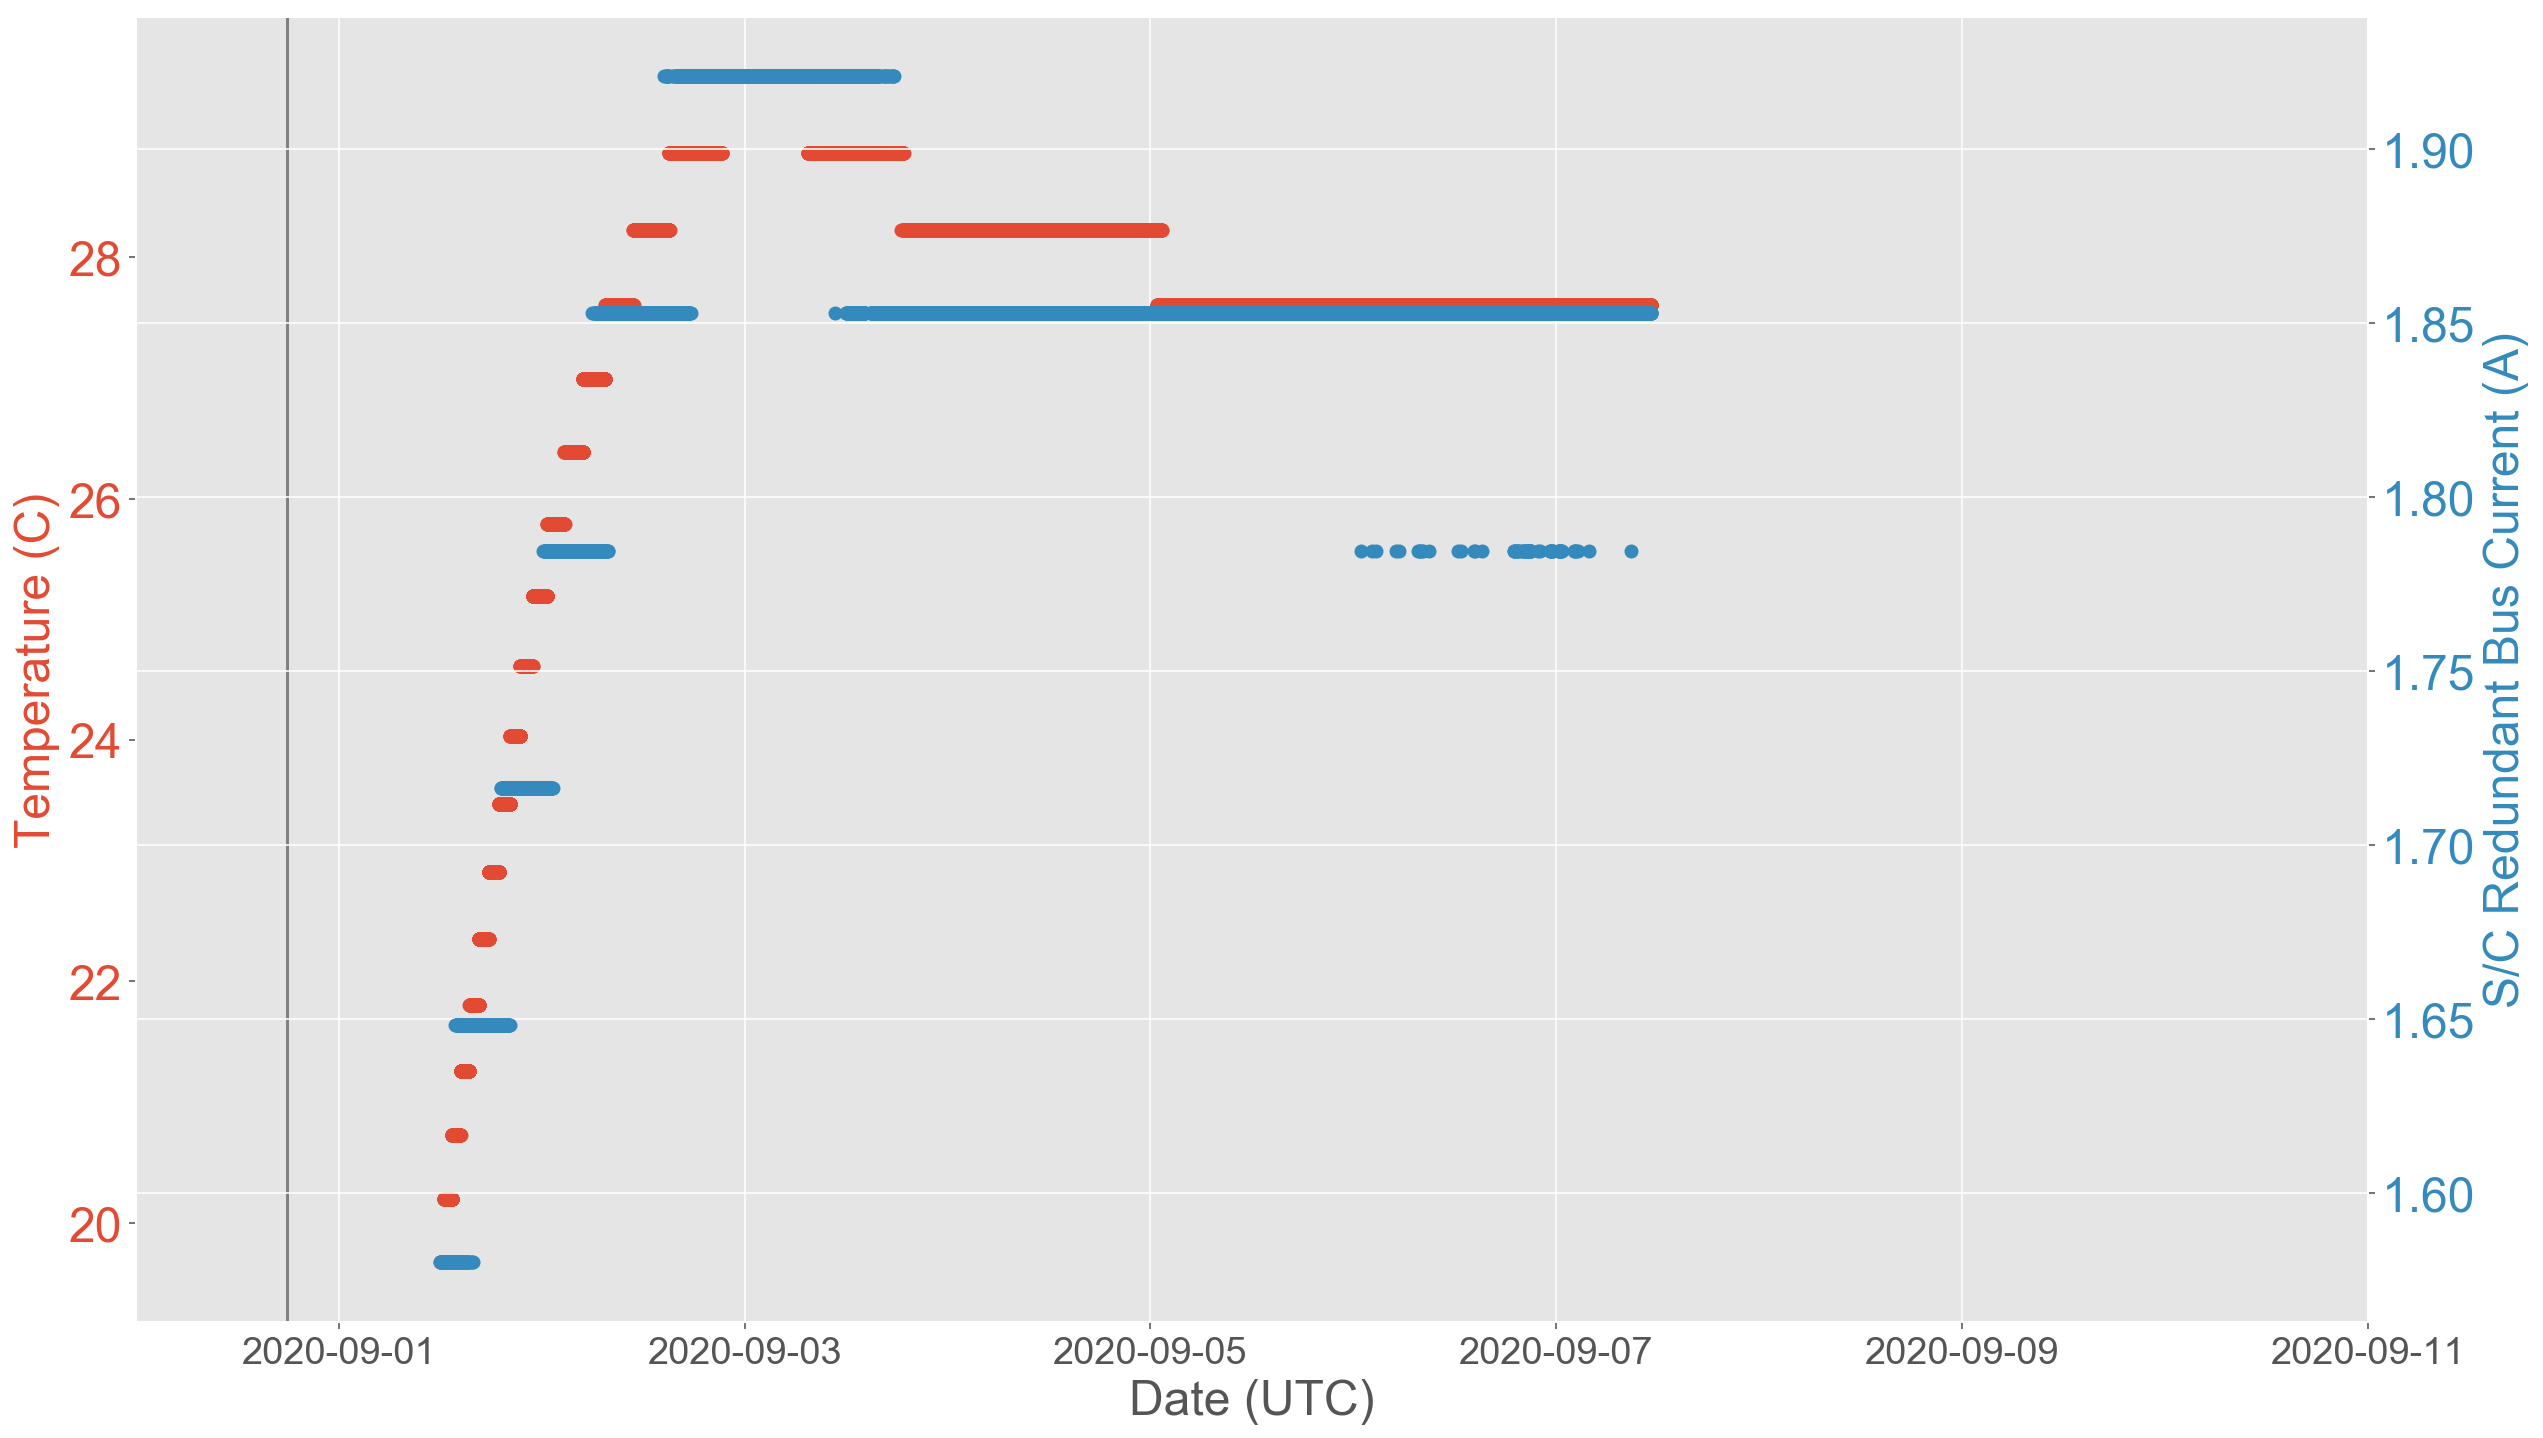

In [11]:
fetch.data_source.set('maude')

rasterized=True
markersize=1.2
labelsizes = 28
plt.rcParams['axes.titlesize'] = labelsizes
plt.rcParams['axes.labelsize'] = labelsizes - 4
plt.rcParams['xtick.labelsize'] = labelsizes - 9
plt.rcParams['ytick.labelsize'] = labelsizes - 4


dat = fetch.get_telem(['2PRBSCR', '2CHTRPZT'], start='2020:245')

fig, ax1 = plt.subplots(figsize=(20,12))

ax1.set_xlabel('Date (UTC)')
ax1.set_ylabel('Temperature (C)', color=red)

ax1.plot_date(hrc.convert_chandra_time(dat['2CHTRPZT'].times), dat['2CHTRPZT'].vals, label='CEA Temp (2CHTRPZT)', rasterized=True)
ax1.tick_params(axis='y', labelcolor=red)
xmin = dt.datetime(2020, 8, 31, 0)
xmax = dt.datetime(2020, 9, 11, 0)
ax1.set_xlim(xmin, xmax)
# ax1.legend(loc=2)
ax1.grid('off', axis='y')


ax2 = ax1.twinx() 
ax2.set_ylabel('S/C Redundant Bus Current (A)', color=blue)
ax2.tick_params(axis='y', labelcolor=blue)
ax2.plot_date(hrc.convert_chandra_time(dat['2PRBSCR'].times), dat['2PRBSCR'].vals, color=blue, label='S/C Redundant Bus Current (2PRBSCR)',  rasterized=True)

ax2.set_xlim(xmin, xmax)

# ax2.legend(loc=1)
ax1.axvline(time_of_cap_1543, color='gray')

# fig.tight_layout()
plt.show()

fig.savefig(fig_save_dir + 'fig_for_tom.pdf', dpi=300, rasterized=True, bbox_inches='tight')


Fetching full-resolution data for MSIDS=['2PRBSCR']
  from 2020:235:12:00:00.000 to 2020:250:18:36:21.529


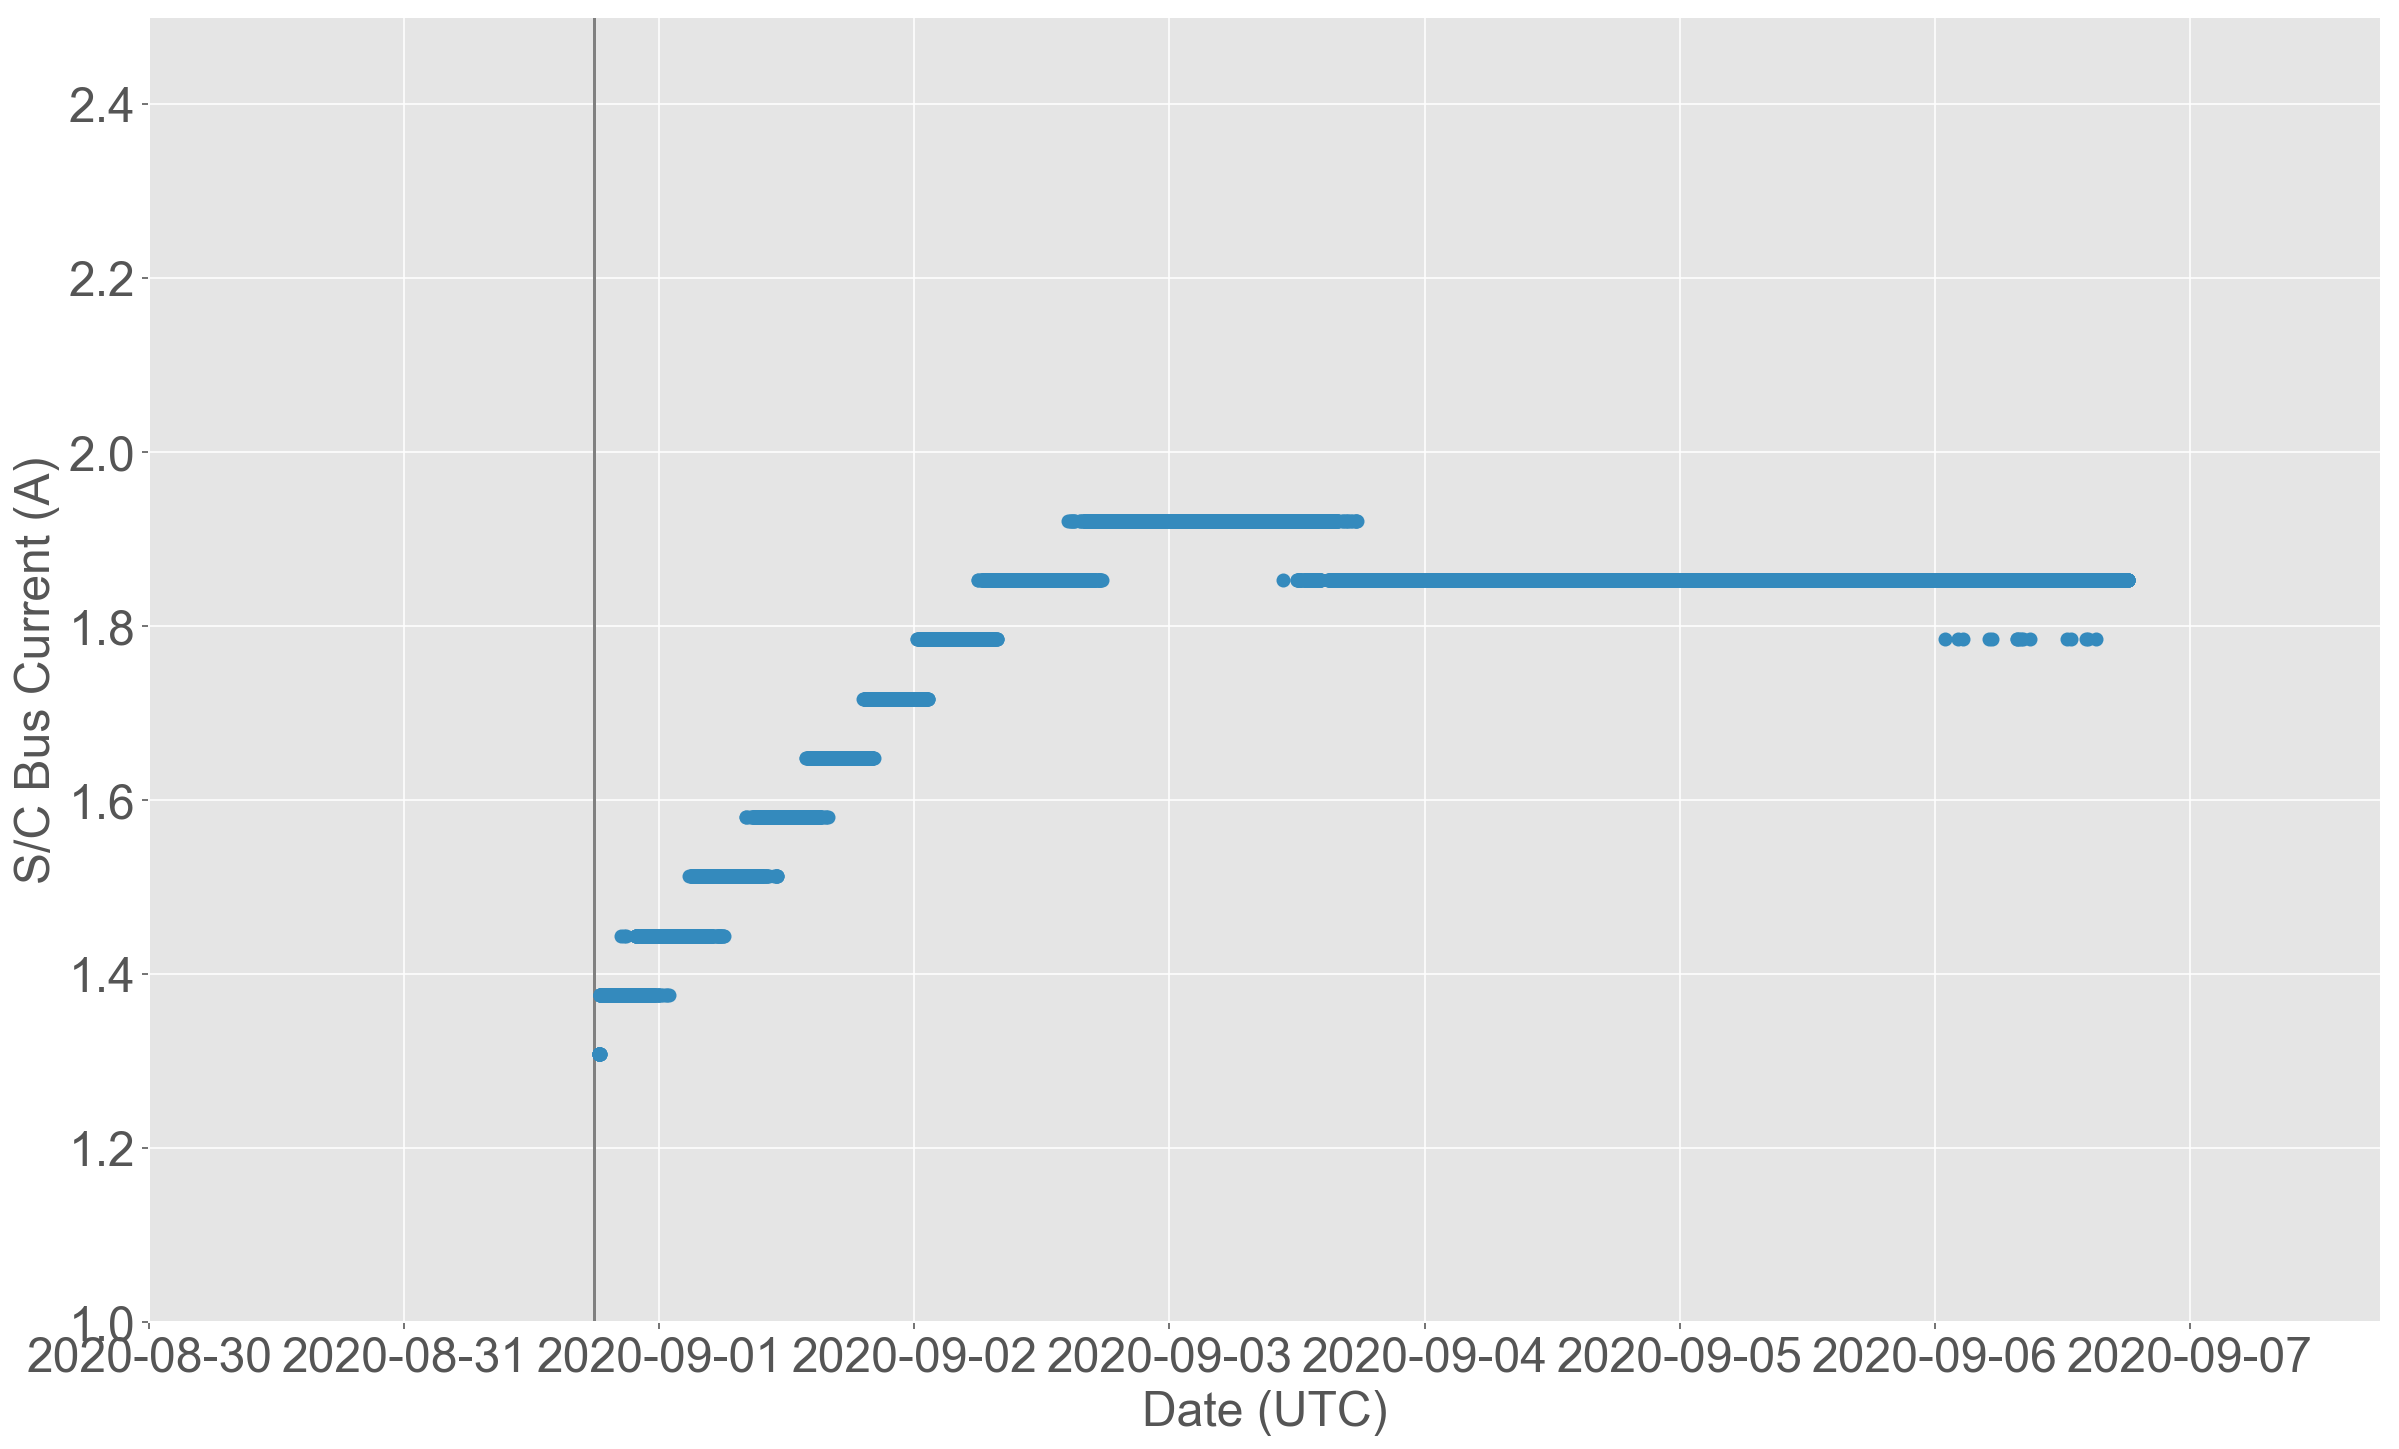

In [74]:
fetch.data_source.set('maude')

rasterized=True
markersize=1.2
labelsizes = 28
plt.rcParams['axes.titlesize'] = labelsizes
plt.rcParams['axes.labelsize'] = labelsizes - 4
plt.rcParams['xtick.labelsize'] = labelsizes - 4
plt.rcParams['ytick.labelsize'] = labelsizes - 4


dat = fetch.get_telem(['2PRBSCR'], start='2020:235')

fig, ax1 = plt.subplots(figsize=(20,12))



ax1.axvline(eventdate, color='gray')
ax1.axvline(hrc_poweroff_date, color='gray')
ax1.axvline(cap_step_2, color='gray')
ax1.axvline(time_of_second_anomaly, color='gray')
ax1.axvline(time_of_secont_shutdown, color='gray')
ax1.axvline(time_of_cap_1543, color='gray')



ax1.set_xlabel('Date (UTC)')
ax1.set_ylabel('S/C Bus Current (A)')

ax1.plot_date(hrc.convert_chandra_time(dat['2PRBSCR'].times), dat['2PRBSCR'].vals, color=blue, rasterized=True)
# ax1.tick_params(axis='y', labelcolor=red)
xmin = dt.datetime(2020, 8, 30, 0)
xmax = dt.datetime(2020, 9, 7, 18)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(1.0, 2.5)
# ax1.legend(loc=2)
# ax1.grid('off', axis='y')


# ax2 = ax1.twinx() 
# ax2.set_ylabel('S/C Redundant Bus Current (A)', color=blue)
# ax2.tick_params(axis='y', labelcolor=blue)
# ax2.plot_date(hrc.convert_chandra_time(dat['2PRBSCR'].times), dat['2PRBSCR'].vals, color=blue, label='S/C Redundant Bus Current (2PRBSCR)',  rasterized=True)

# ax2.set_xlim(xmin, xmax)

# # ax2.legend(loc=1)
# ax1.axvline(time_of_cap_1543, color='gray')

# fig.tight_layout()
plt.show()

fig.savefig(fig_save_dir + 'current.pdf', dpi=300, rasterized=True, bbox_inches='tight')


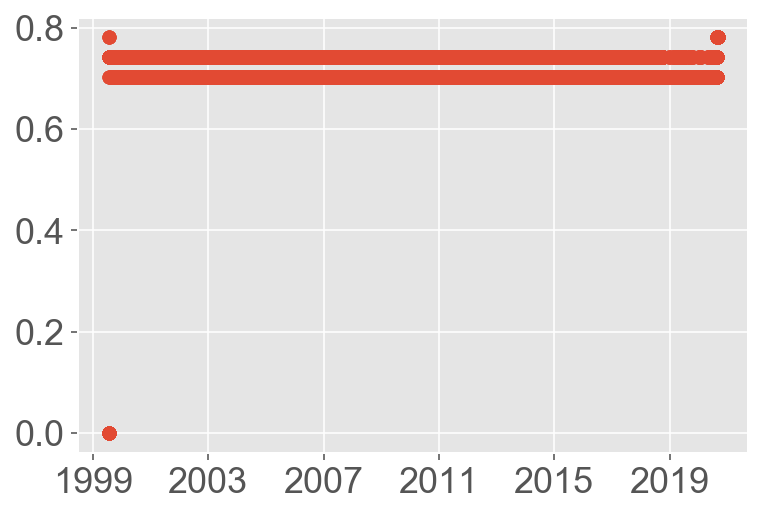

In [60]:

import Ska.engarchive.fetch as fetch
import Chandra.Time

import datetime as dt
import matplotlib.dates as mdate
from matplotlib import gridspec

import matplotlib.pyplot as plt

import numpy as np

from hrcsentinel import hrccore as hrc

# allow_subset=True should let us draw more data points
fetch.data_source.set('maude')
# fetch.data_source.set('maude')

hrc.styleplots()



fig, ax = plt.subplots()

msid = fetch.MSID('2P05VBVL', start='1999:204')

ax.plot_date(hrc.convert_chandra_time(msid.times), msid.vals)

plt.show()



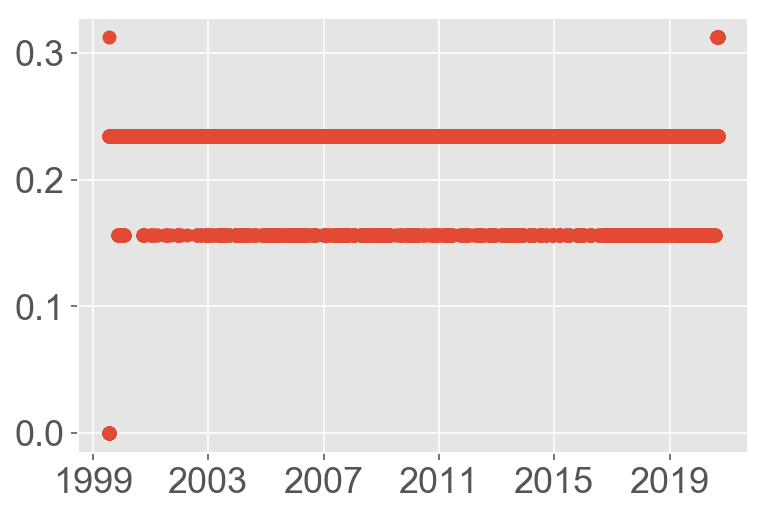

In [61]:

import Ska.engarchive.fetch as fetch
import Chandra.Time

import datetime as dt
import matplotlib.dates as mdate
from matplotlib import gridspec

import matplotlib.pyplot as plt

import numpy as np

from hrcsentinel import hrccore as hrc

# allow_subset=True should let us draw more data points
fetch.data_source.set('maude')
# fetch.data_source.set('maude')

hrc.styleplots()



fig, ax = plt.subplots()

msid = fetch.MSID('2P15VBVL', start='1999:204')

ax.plot_date(hrc.convert_chandra_time(msid.times), msid.vals)

plt.show()

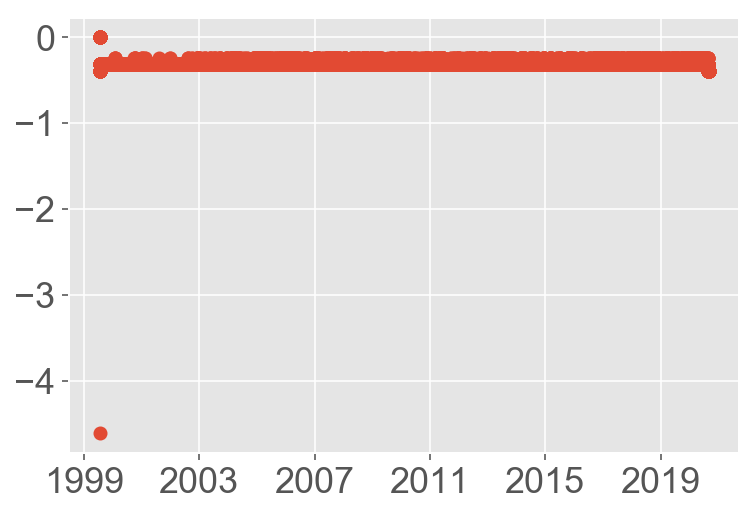

In [62]:

import Ska.engarchive.fetch as fetch
import Chandra.Time

import datetime as dt
import matplotlib.dates as mdate
from matplotlib import gridspec

import matplotlib.pyplot as plt

import numpy as np

from hrcsentinel import hrccore as hrc

# allow_subset=True should let us draw more data points
fetch.data_source.set('maude')
# fetch.data_source.set('maude')

hrc.styleplots()



fig, ax = plt.subplots()

msid = fetch.MSID('2N15VBVL', start='1999:204')

ax.plot_date(hrc.convert_chandra_time(msid.times), msid.vals)

plt.show()

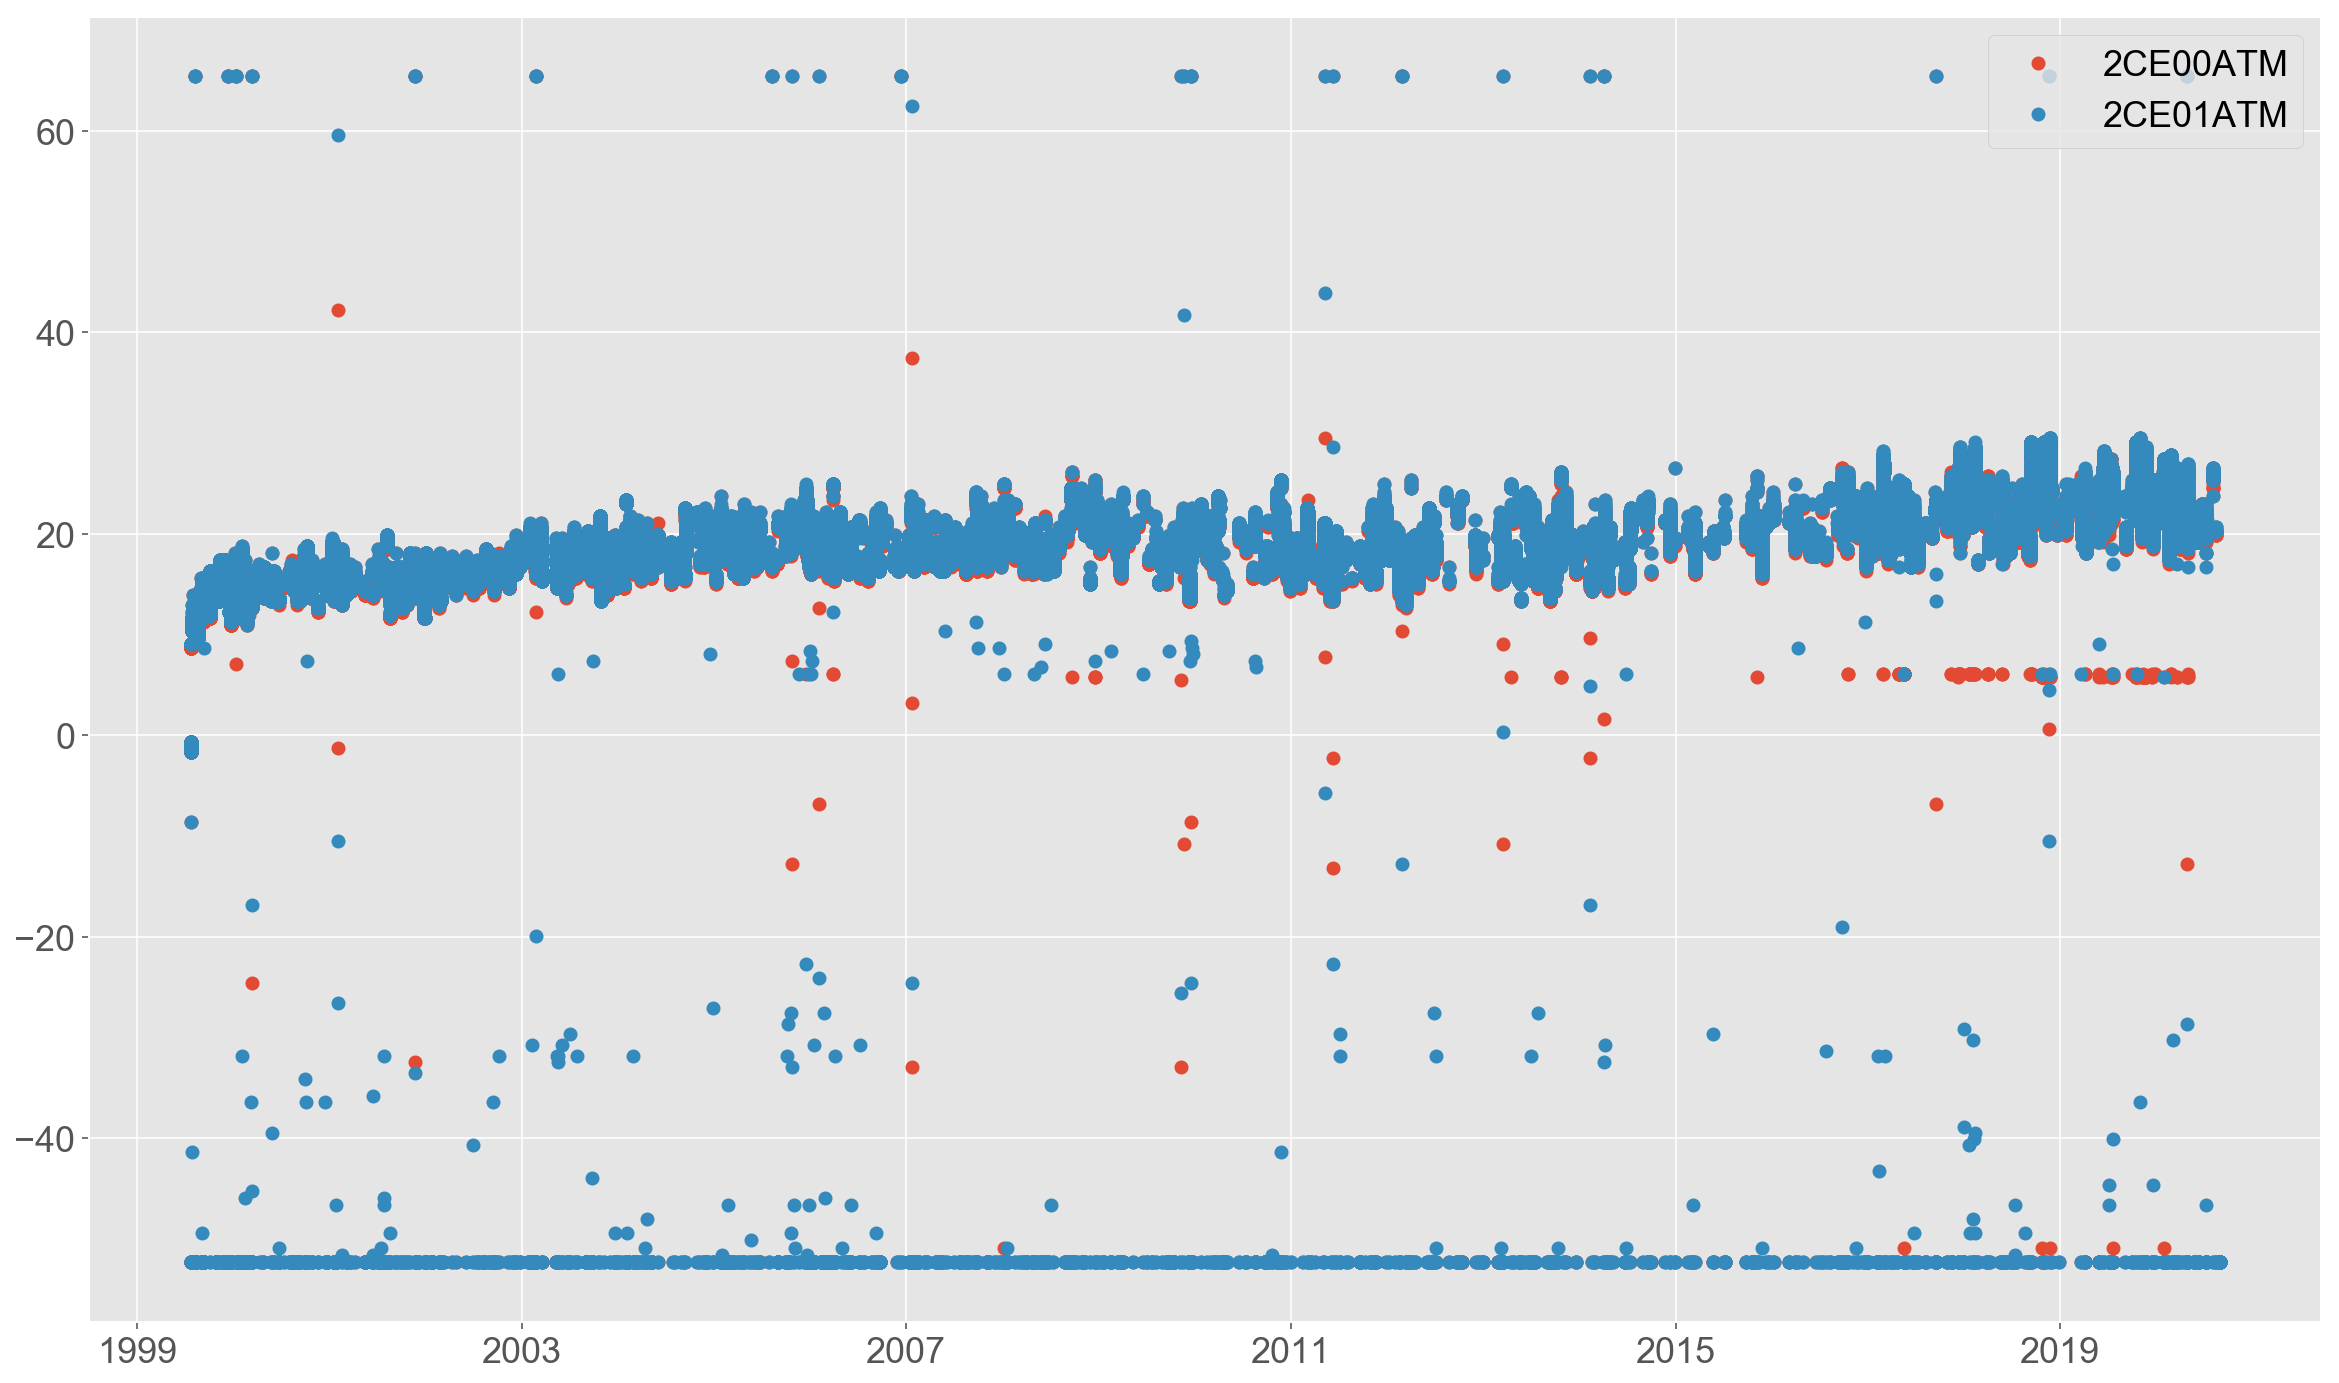

In [249]:


setting_msids = ['2CE00ATM', '2CE01ATM']

fig, ax = plt.subplots(figsize=(20,12))
for msid in setting_msids:
    msid = fetch.MSID(msid, start='1999:204')
    ax.plot_date(hrc.convert_chandra_time(msid.times), msid.vals, label=msid.msid)
    
ax.legend()
    
    
plt.show()

[141 141 141 ..., 255 255 255]
[185 185 185 ..., 255 255 255]
[127 127 127 ..., 255 255 255]


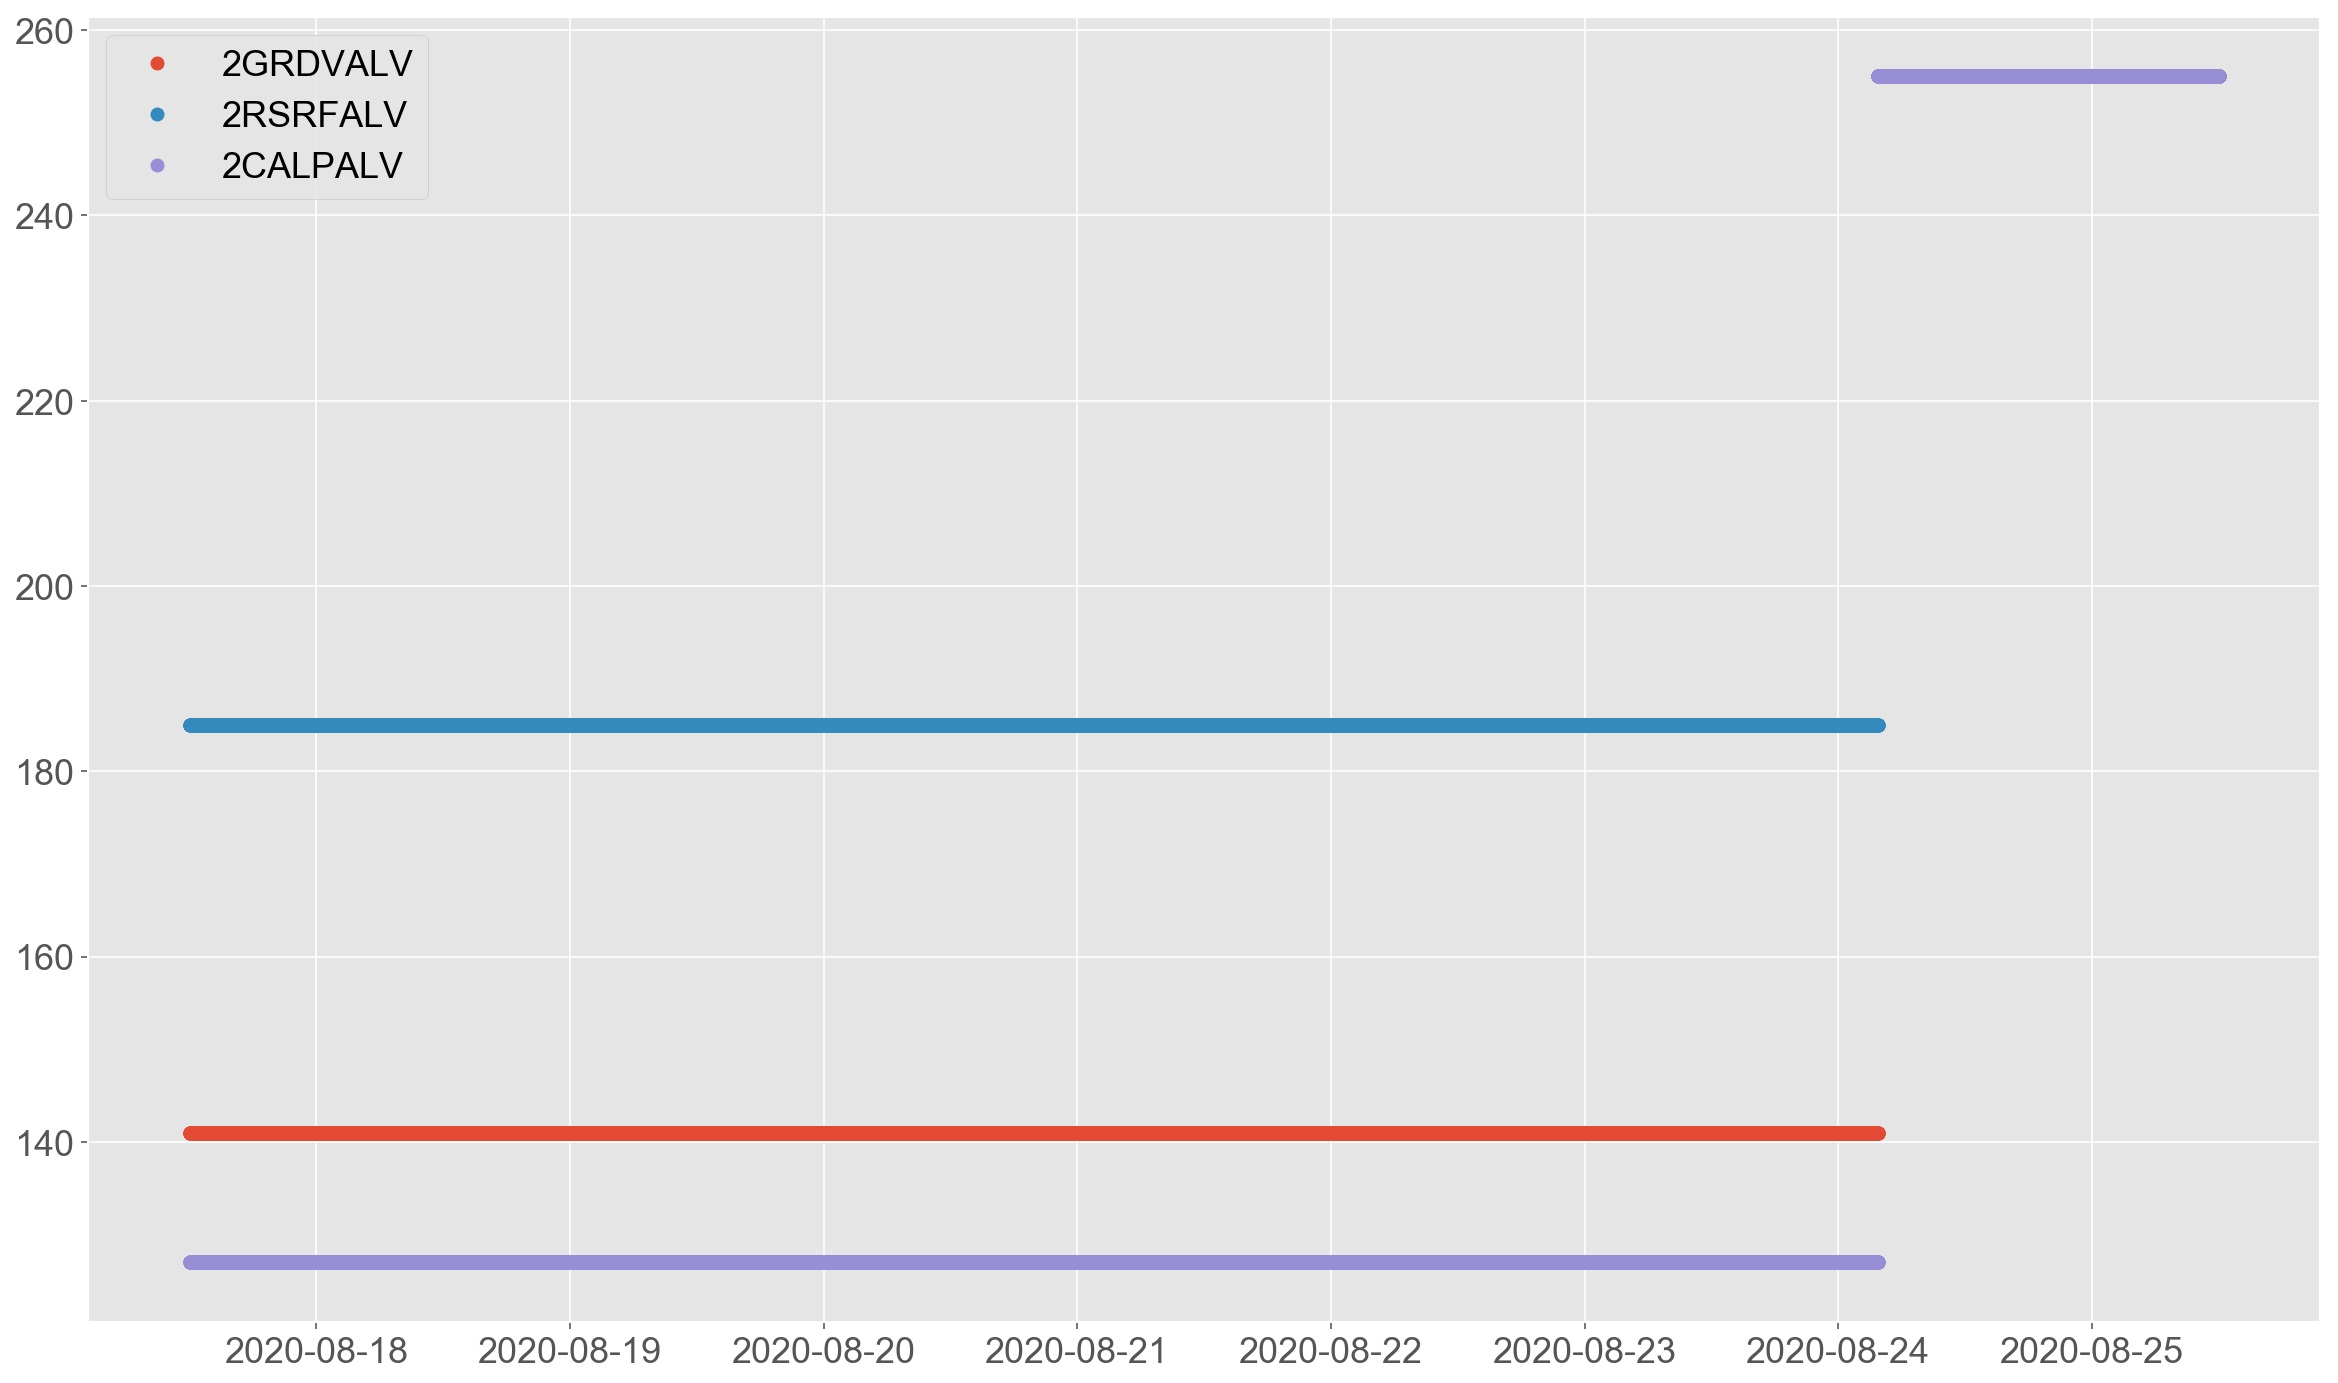

In [147]:
setting_msids = ['2GRDVALV', '2RSRFALV', '2CALPALV']

fig, ax = plt.subplots(figsize=(20,12))
for msid in setting_msids:
    msid = fetch.MSID(msid, start='2020:230', stop='2020:238')
    ax.plot_date(hrc.convert_chandra_time(msid.times), msid.vals, label=msid.msid)
    print(msid.vals)
    
ax.legend()
    
    
plt.show()

In [240]:
msidset = fetch.MSIDset(temperature_msids, start='2020:230')

In [243]:


from astropy.table import Table
Table(msidset)

ValueError: Elements in list initialization must be either Column or list-like

In [263]:
primbus_msids = ['2PRBSVL', '2PRBSCR']

fetch.data_source.set('maude')
fig, ax = plt.subplots(figsize=(20,12))

rasterized=True
markersize=1.5


ax.axvline(sunday_pass, color='gray')
ax.axvline(sunday_pass_end, color='gray', linestyle='dashed')
ax.axvline(eventdate, color='gray')
ax.axvline(hrc_poweroff_date, color='gray')
ax.axvline(cap_step_2, color='gray')
ax.axvline(thursday_early_pass, color='gray')
ax.axvline(thursday_early_pass_end, color='gray', linestyle='dashed')

for item in primbus_msids:
    msid = fetch.MSID(item, start='1999:204')
    
    ax.plot_date(hrc.convert_chandra_time(msid.times), msid.vals, label=item.msid)

ax.legend()
    
plt.show()


AttributeError: 'str' object has no attribute 'msid'

MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE


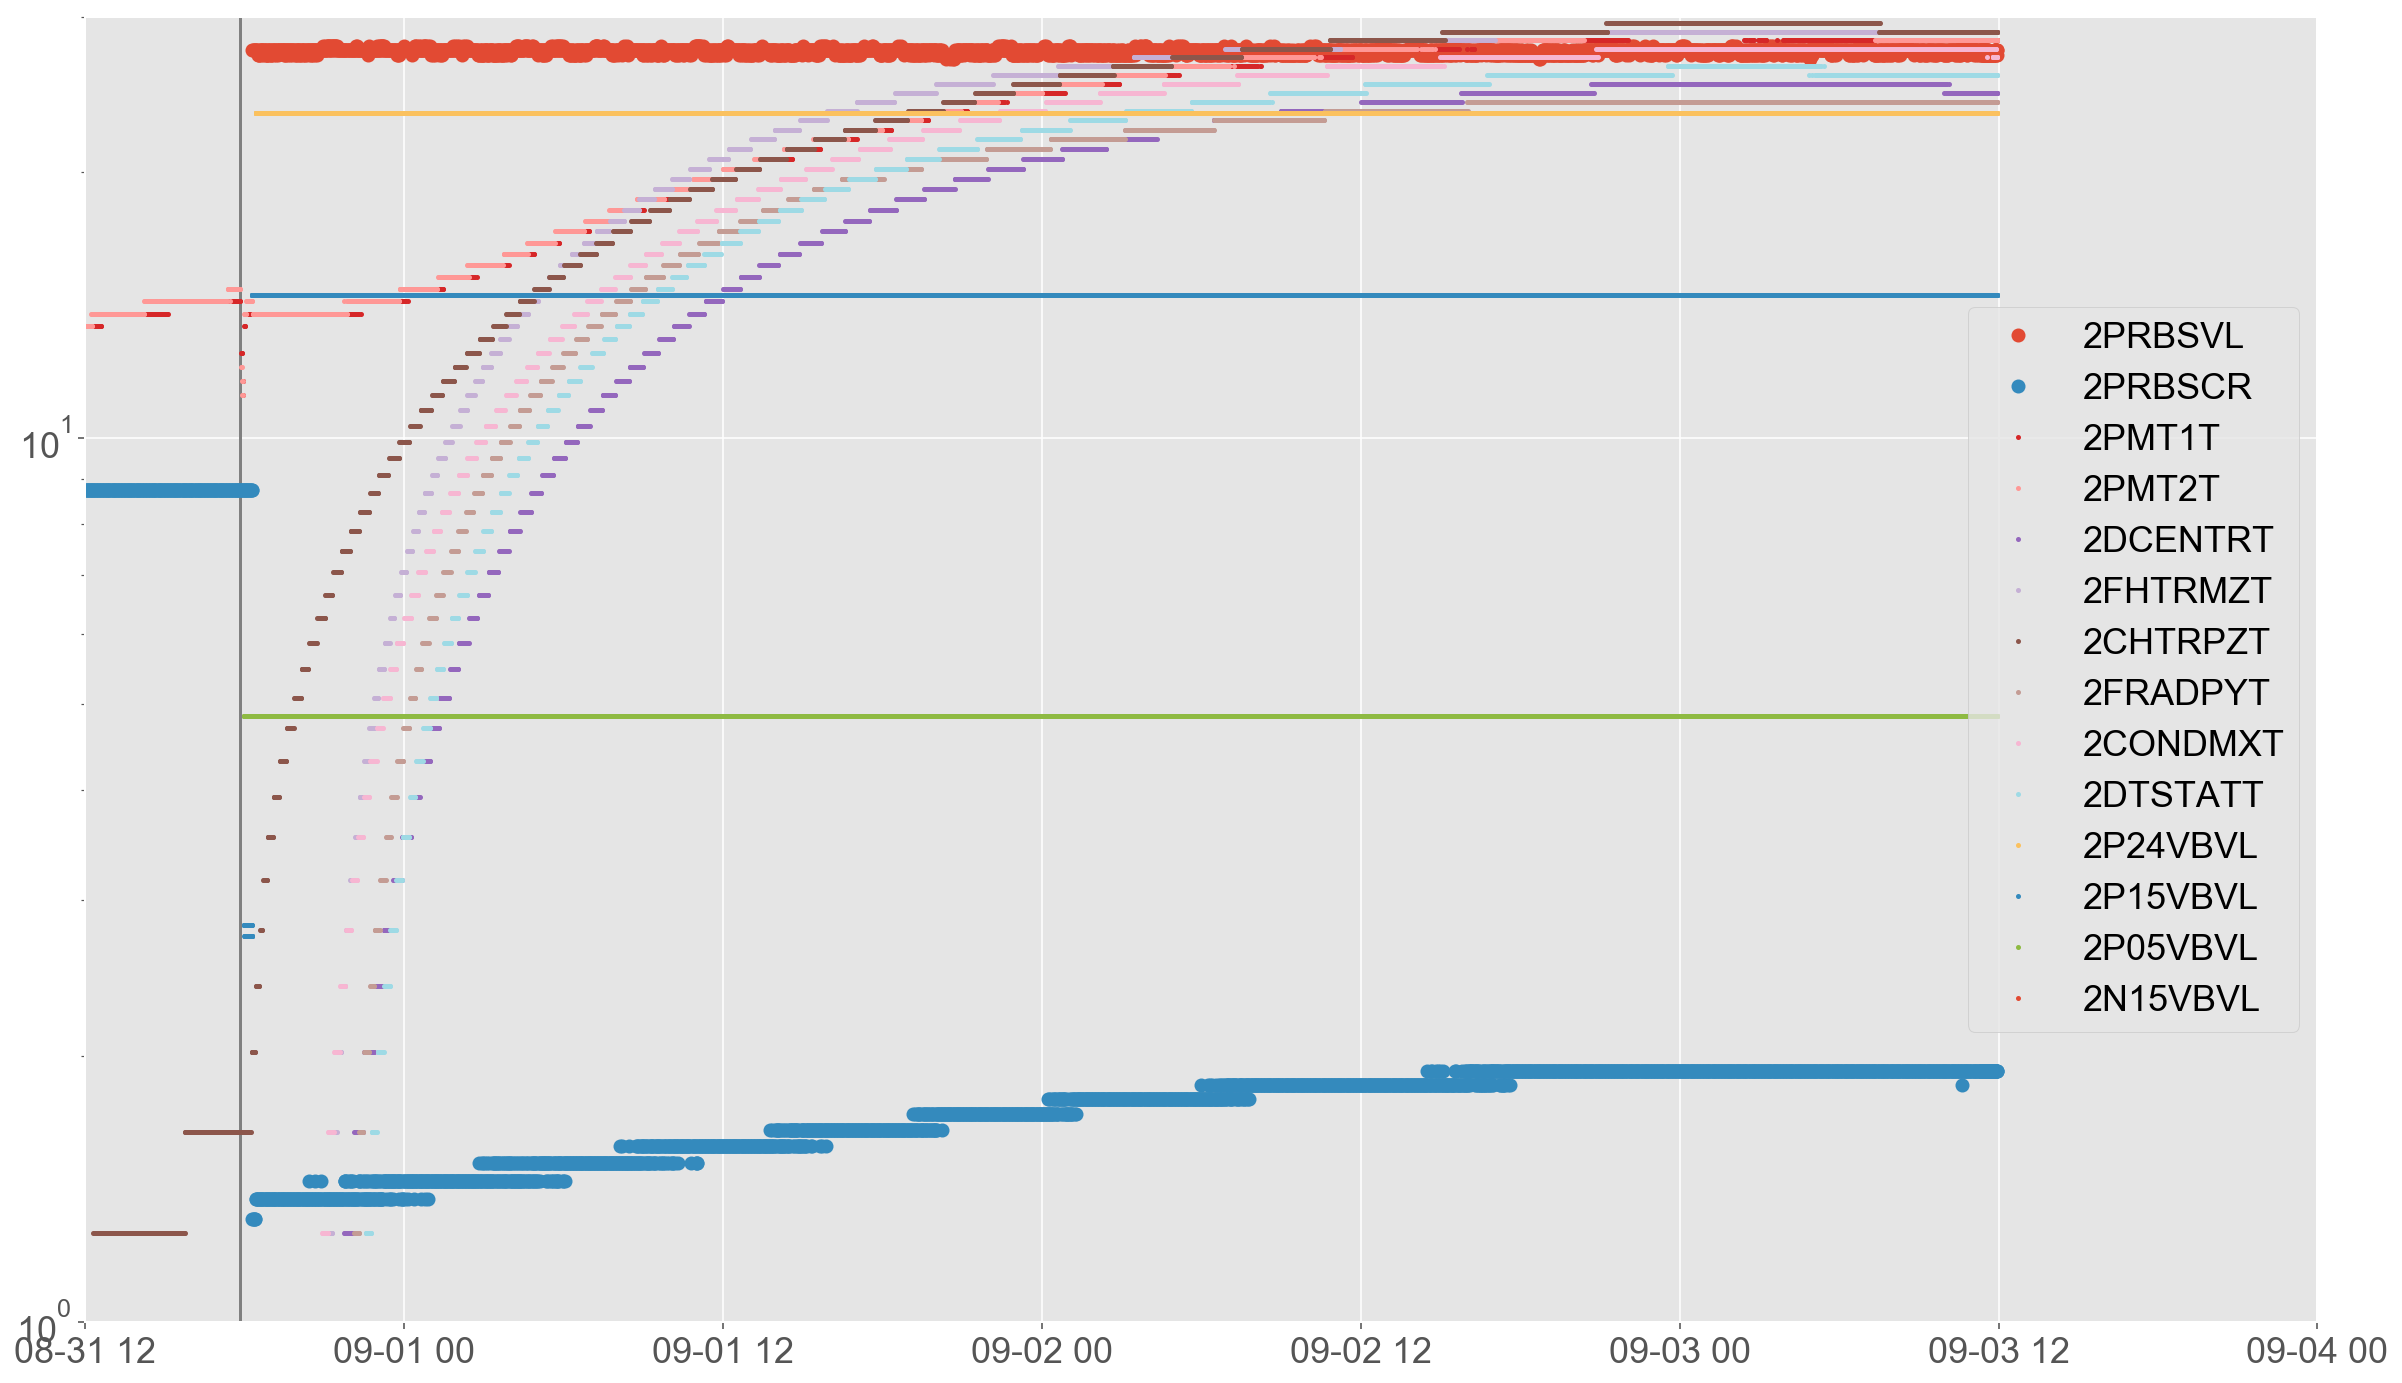

In [299]:

fetch.data_source.set('maude')
fig, ax = plt.subplots(figsize=(20, 12))

primbus_msids = ['2PRBSVL', '2PRBSCR']
ax.axvline(eventdate, color='red')
ax.axvline(time_of_second_anomaly, color='red')
ax.axvline(cap_step_2, color='gray')
ax.axvline(time_of_cap_1543, color='gray')

for item in primbus_msids:
    msid = fetch.MSID(item, start='2020:204')

    ax.plot_date(hrc.convert_chandra_time(
        msid.times), msid.vals, label=msid.msid)



n_lines = len(temperature_msids)
color_idx = np.linspace(0, 1, n_lines)


for i, msid in zip(color_idx, temperature_msids):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:225')
    print('DONE')
    
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    if msid.content == 'hrc5eng':
        ax.plot_date(times, vals, markersize=markersize, rasterized=rasterized, color=plt.cm.tab20(i), label=msid.MSID)

        
for msid, color in zip(voltage_msids_b, colors_to_use):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:244')
    print('DONE')
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    start_bplot_idx = np.where(times < cut_aside_mdate)[0][0]

    ax.plot_date(times[start_bplot_idx:], vals[start_bplot_idx:], markersize=markersize, rasterized=rasterized, color=color,  label=msid.MSID)
 

ax.legend()

xmin = dt.datetime(2020,8, 31, 12)
xmax = end_date
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 30)
ax.set_yscale('log')

plt.show()


MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE
MAUDE FETCH...DONE


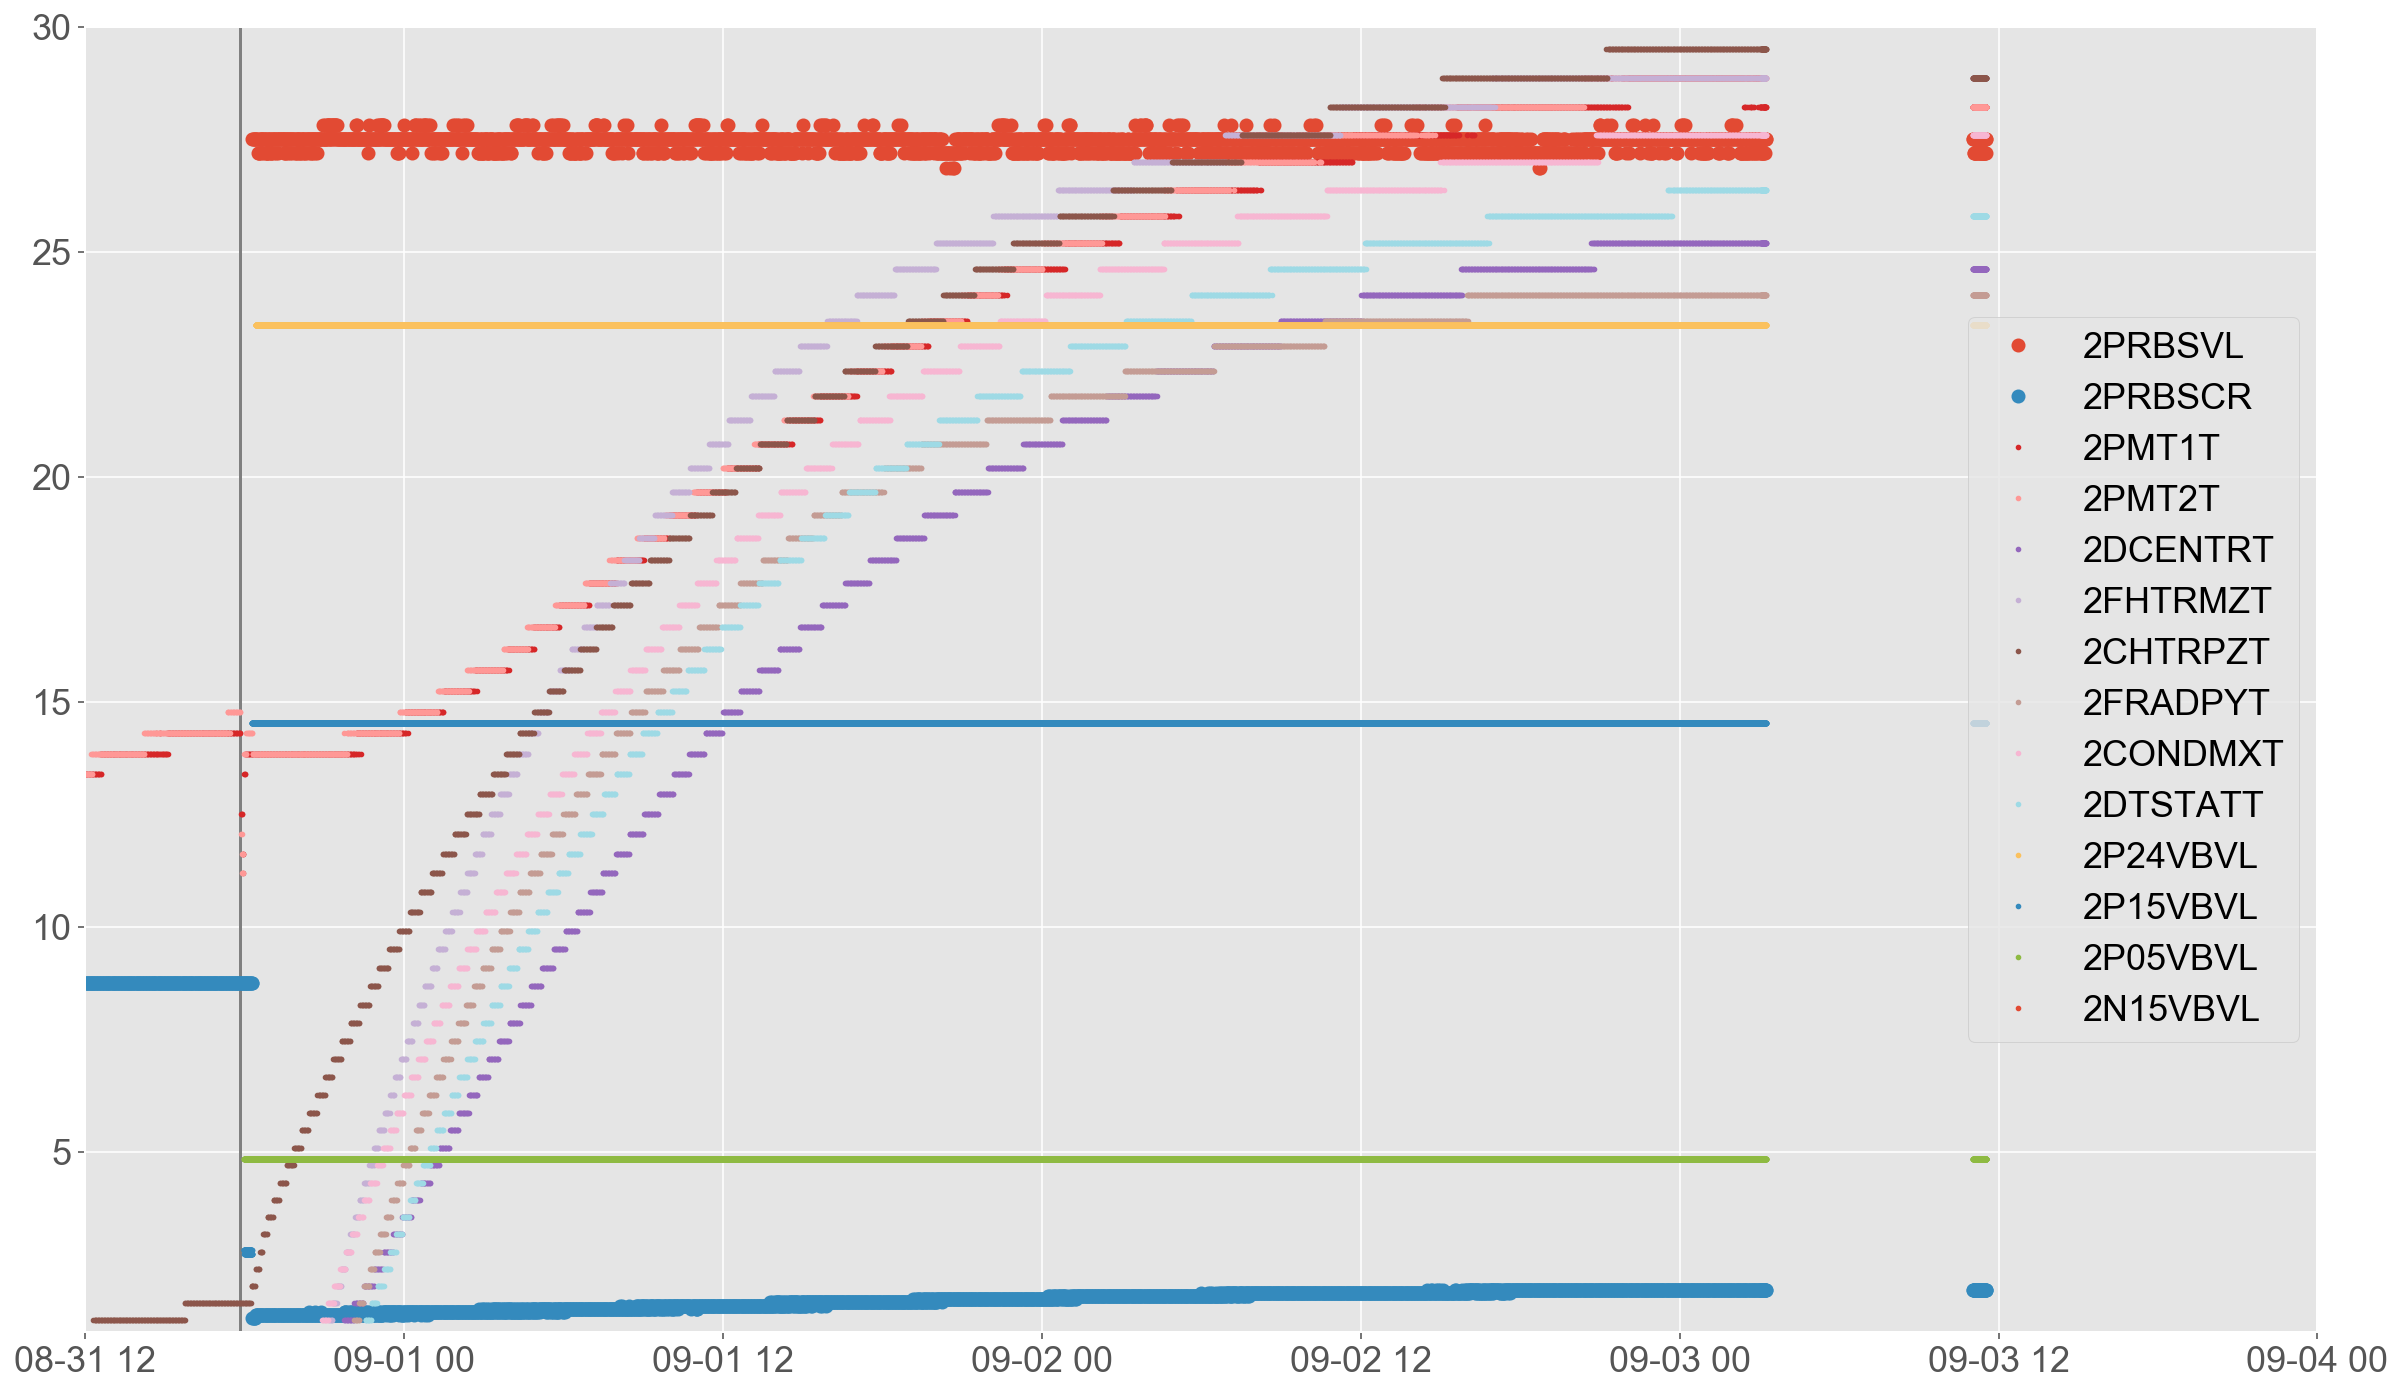

In [296]:

fetch.data_source.set('maude')
fig, ax = plt.subplots(figsize=(20, 12))

primbus_msids = ['2PRBSVL', '2PRBSCR']
ax.axvline(eventdate, color='red')
ax.axvline(time_of_second_anomaly, color='red')
ax.axvline(cap_step_2, color='gray')
ax.axvline(time_of_cap_1543, color='gray')

for item in primbus_msids:
    msid = fetch.MSID(item, start='2020:204')

    ax.plot_date(hrc.convert_chandra_time(
        msid.times), msid.vals, label=msid.msid)



n_lines = len(temperature_msids)
color_idx = np.linspace(0, 1, n_lines)


for i, msid in zip(color_idx, temperature_msids):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:225')
    print('DONE')
    
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    if msid.content == 'hrc5eng':
        ax.plot_date(times, vals, markersize=markersize, rasterized=rasterized, color=plt.cm.tab20(i), label=msid.MSID)

        
for msid, color in zip(voltage_msids_b, colors_to_use):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:244')
    print('DONE')
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    start_bplot_idx = np.where(times < cut_aside_mdate)[0][0]

    ax.plot_date(times[start_bplot_idx:], vals[start_bplot_idx:], markersize=markersize, rasterized=rasterized, color=color,  label=msid.MSID)
 
        
ax.legend()

xmin = dt.datetime(2020,8, 31, 12)
xmax = end_date
ax.set_xlim(xmin, xmax)
ax.set_ylim(1, 30)


plt.show()
fig.savefig('test.pdf', dpi=300)
